In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://www.lupacity.com/wp-content/uploads/2015/05/iteso.jpg" width="400" height="300" />


# EXAMEN EXTRAORDINARIO - 2023
# MODELO NO LINEAL PARA PRONÓSTICOS

## Nombre:

## Fecha: 1 de Agosto del 2023

## Por: Oscar David Jaramillo Z.

In [ ]:
pip install git+https://github.com/statsmodels/statsmodels

  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-zc5r3aa3
  Running command git clone --filter=blob:none --quiet https://github.com/statsmodels/statsmodels /tmp/pip-req-build-zc5r3aa3
  Resolved https://github.com/statsmodels/statsmodels to commit 3b61c469ed8d4a6752b5bf01390789512f81f0c6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for statsmodels: filename=statsmodels-0.15.0.dev44+g3b61c469e-cp310-cp310-linux_x86_64.whl size=21308156 sha256=09485145a4e2ea4be3ca1722459a5d0620f37c5849c72e9ae3925aa55823a123
  Stored in directory: /tmp/pip-ephem-wheel-cache-ukhiyu8e/wheels/80/42/7e/512a0e0b733106dec3d046d1f77208d4f64f601a266ad861dc
Successfully built statsmodels
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled s

In [3]:
pip install optuna pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 90.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.0 MB/s eta 0:00:00


In [281]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 112.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 46.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import keras
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import statsmodels as st
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.seasonal import MSTL
import optuna


# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
import statsmodels
print(statsmodels.__version__)

0.13.5


# Parte 1: Modelos Lineales para Series de Tiempo Univariadas (Puntuación total: 30 puntos)
Para este primer enunciado se utilizará la base de datos adjuntada llamada [`Demanda_historica.csv`](https://drive.google.com/file/d/1YuA3EN_cfa9LlFrI0xxMmJMYxXqegkms/view?usp=sharing). El contexto de este dataset es el siguiente:
> El conjunto de datos contiene la demanda histórica de productos de una empresa de fabricación con presencia en todo el mundo. La compañía ofrece miles de productos dentro de docenas de categorías de productos. Hay cuatro almacenes centrales para enviar productos dentro de la región de la que es responsable. Dado que los productos se fabrican en diferentes lugares de todo el mundo, normalmente lleva más de un mes enviar productos por mar a diferentes almacenes centrales. Si se pueden lograr pronósticos para cada producto en una central diferente con una precisión razonable para la demanda mensual de un mes tras otro, sería beneficioso para la empresa de múltiples maneras

1) Realizar el EDA correspondiente de la serie de tiempo suministrada (realizar los análisis estadísticos correspondientes en base a la información suministrada, explique todos los análisis y consideraciones realizadas). Además, análise los patrones por día de la semana y por estación (reporte los insights encontrados y/o gráficas que sustenten tu respuesta). Finalmente, hacer un gráfico de la serie de tiempo donde el eje x corresponda a las fechas. Antes de esto asegúrese de que la serie de tiempo no tenga NAs y Outliers y de haber dividido en train y en test (75 y 25). Realice las transformaciones y/o escalamientos que considere pertinentes (justifique sus análisis) (20 puntos).
2) Analizar la serie de tiempo (La de train) y describir sus características principales (estacionariedad, estacionalidad, tendencia y autocorrelación). Generar los respectivos gráficos o test donde pueda sustentar sus conclusiones (20 puntos).
3) De acuerdo con las características anteriores ¿Qué modelo cree usted que se puede acomodar bien a los datos (train) y por qué? Pruebe al menos 15 modelos distintos tipo SARIMA para los datos que concuerden con el inciso 2 (20 puntos).
4) Escoger el mejor modelo entre los anteriores y hacer un análisis de los residuos de éste. Que puede decir de éstos residuos? (incluir al menos un gráfico o una prueba de hipótesis de ruido blanco) (20 puntos)
5) Hacer un pronóstico de la misma longitud del test con el modelo que eligió en el inciso 3. Recuerde que este forecast deberá ir incluyendo en cada nuevo paso de pronóstico el valor anterior del dato de test. Por ejemplo, si el conjunto de test tiene 10 muestras, el primer forecast sólo incluye estimaciones del modelo entrenado con datos de train. Para la segunda predicción, se agrega a los datos de entrenamiento el primer valor del conjunto de test, se entrena el modelo con esos nuevos datos y se genera la predicción. Este proceso continua sucesivamente en cada paso de predicción. Agregue un gráfico que muestre claramente los datos de train, test y predicción (20 puntos).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Examen extraordinario MNLP/ExamenExtraordinario/Demanda_historica.csv')
df.head()

Product_Code Warehouse Product_Category       Date Order_Demand
0  Product_0993    Whse_J     Category_028  2012/7/27         100 
1  Product_0979    Whse_J     Category_028  2012/1/19         500 
2  Product_0979    Whse_J     Category_028   2012/2/3         500 
3  Product_0979    Whse_J     Category_028   2012/2/9         500 
4  Product_0979    Whse_J     Category_028   2012/3/2         500

In [ ]:
# Descripción del dataset
df.describe()

Product_Code Warehouse Product_Category       Date Order_Demand
count        1048575   1048575          1048575    1037336      1048575
unique          2160         4               33       1729         3828
top     Product_1359    Whse_J     Category_019  2013/9/27        1000 
freq           16936    764447           481099       2075       112682

In [ ]:
for col in df.columns:
    cuenta = df[col].isnull().sum()
    print(f'Existen {cuenta} nulos en la columna: {col}')

Existen 0 nulos en la columna: Product_Code
Existen 0 nulos en la columna: Warehouse
Existen 0 nulos en la columna: Product_Category
Existen 11239 nulos en la columna: Date
Existen 0 nulos en la columna: Order_Demand


In [ ]:
# Hay que limpiar el dataset ya que las entradas probablemente fueron escritas a mano y contienen espacios, paréntesis y están en formato de objeto
df.Order_Demand.unique()




array(['100 ', '500 ', '50000 ', ..., '(3750)', '(191)', '28250 '],
      dtype=object)

In [ ]:
import pandas as pd
import re

def clean_and_convert_to_numeric(df, column_name):
    # Eliminar espacios al inicio y final de cada valor
    df[column_name] = df[column_name].str.strip()

    # Eliminar caracteres especiales usando una expresión regular (solo se permiten letras, números y puntos)
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'[^\w\s.]', '', x))

    # Convertir la columna a numérica
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

    return df


In [ ]:
# Convertir la columna Order Demand en un valor numérico
clean_and_convert_to_numeric(df, 'Order_Demand')
df.Order_Demand.isnull().sum()

0

In [ ]:
df = df.loc[df.Order_Demand>0]

In [ ]:
# Como los nulos en la categoria date son pocos, he decidido dropearlos
df = df.dropna()
df.shape

(1008664, 5)

In [ ]:
# Convertir el formato de la columna Date a un formato datetime
df.Date = df.Date.astype('datetime64[ns]')




In [ ]:
# Dadas las características del problema, hay que separar cada almacén
groups = df.groupby('Warehouse')

warehouses = {}
for warehouse, group in groups:
    warehouses[warehouse] = group

In [ ]:
warehouses['Whse_J']

Product_Code Warehouse Product_Category       Date  Order_Demand
0        Product_0993    Whse_J     Category_028 2012-07-27           100
1        Product_0979    Whse_J     Category_028 2012-01-19           500
2        Product_0979    Whse_J     Category_028 2012-02-03           500
3        Product_0979    Whse_J     Category_028 2012-02-09           500
4        Product_0979    Whse_J     Category_028 2012-03-02           500
...               ...       ...              ...        ...           ...
1048570  Product_1791    Whse_J     Category_006 2016-04-27          1000
1048571  Product_1974    Whse_J     Category_006 2016-04-27             1
1048572  Product_1787    Whse_J     Category_006 2016-04-28          2500
1048573  Product_0901    Whse_J     Category_023 2016-10-07            50
1048574  Product_0704    Whse_J     Category_001 2016-06-27             4

[760611 rows x 5 columns]

In [ ]:
# Dadas las características del problema, hay que separar cada producto
groups = df.groupby('Product_Code')

products = {}
for product, group in groups:
    products[product] = group

In [ ]:
# Inicio del análisis del producto 1. En siguientes celdas se hará una función para agilizar el código
df = products['Product_0001']



# Para efectos del exámen se realizará todo el análisis y predicción para esta serie de tiempo.
# Las conclusiones del análisis de esta serie se asumirán para todos los productos

In [ ]:
df = df[['Date', 'Order_Demand']]
df.index = df.Date
df.drop('Date', axis = 1, inplace = True)
df

Order_Demand
Date                    
2012-01-05           100
2012-05-17           100
2012-08-15           400
2012-01-10          2000
2012-02-06          3000
...                  ...
2016-06-23           100
2016-01-05           300
2016-01-07           300
2016-11-01           100
2016-03-02           500

[595 rows x 1 columns]

<Axes: >

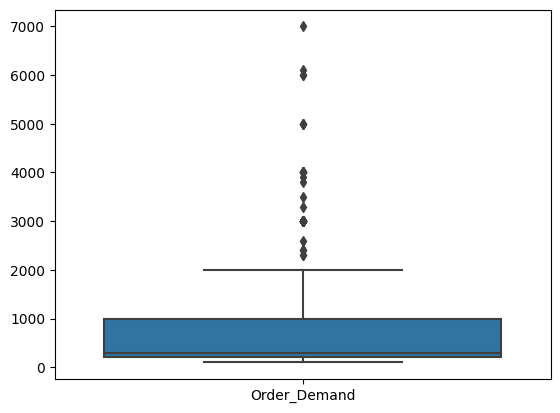

In [ ]:
# Boxplot. Debe haber un método para tratar los outliers
sns.boxplot(df)

<Axes: xlabel='Date'>

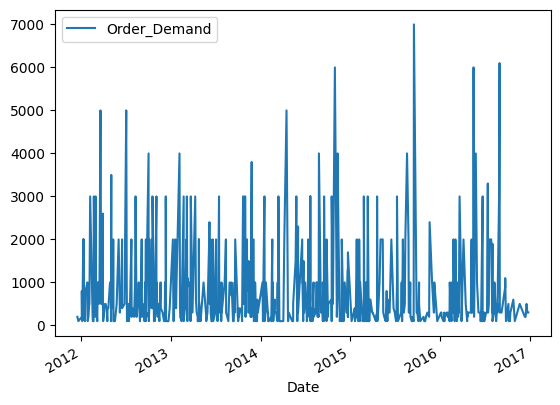

In [ ]:
# Plot de la serie de tiempo
df.plot()

array([[<Axes: title={'center': 'Order_Demand'}>]], dtype=object)

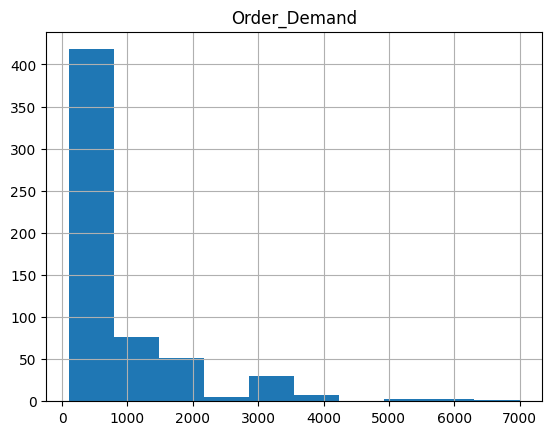

In [ ]:
# Histograma antes de las transformaciones
df.hist()

In [ ]:
# Transformación logarítmica del producto
df['Order_Demand_log'] = np.log(df['Order_Demand'])


In [ ]:
# Usaré la transformación logarítmica y dropearé los outliers restantes
Q1 = df['Order_Demand_log'].quantile(0.25)
Q3 = df['Order_Demand_log'].quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers
outliers = df[(df['Order_Demand_log'] < Q1 - 1.5 * IQR) | (df['Order_Demand_log'] > Q3 + 1.5 * IQR)]

# Mostrar los outliers
df = df.drop(outliers.index).sort_index()

#Resamplamos por mes por requrimientos del problema
df = df.resample('M').mean()
df

Order_Demand  Order_Demand_log
Date                                      
2011-12-31    150.000000          4.951744
2012-01-31    646.666667          5.958550
2012-02-29   1000.000000          6.272531
2012-03-31   1084.615385          6.449890
2012-04-30    471.428571          5.988076
...                  ...               ...
2016-08-31   1590.909091          6.544073
2016-09-30    471.428571          5.889394
2016-10-31    300.000000          5.503966
2016-11-30    300.000000          5.409889
2016-12-31    283.333333          5.586188

[61 rows x 2 columns]

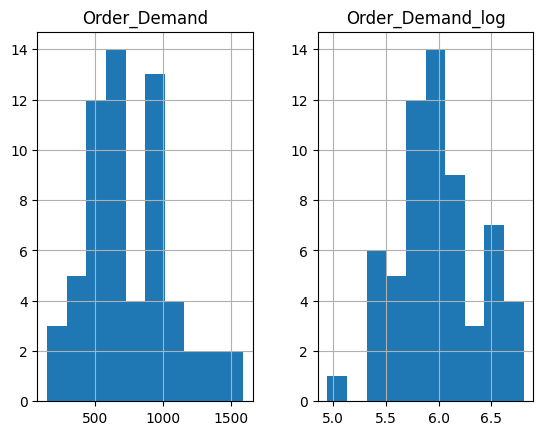

In [ ]:
# Diferencias entre los histogramas
df.hist()

# Usaré la variable transformada
df.drop('Order_Demand', axis = 1, inplace = True)

Text(0.5, 1.0, 'Time series')

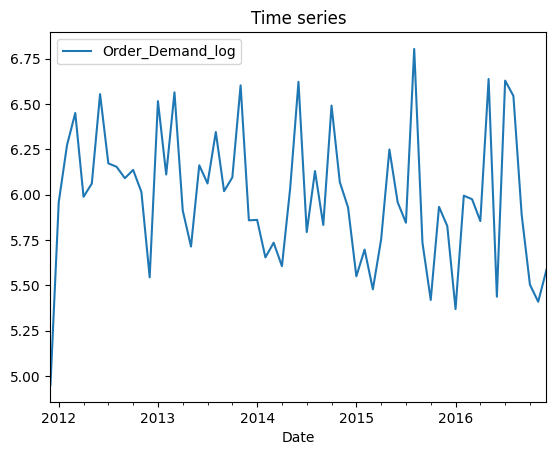

In [ ]:
df.plot()
plt.title('Time series')

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.25, shuffle = False)
train.shape, test.shape

((45, 1), (16, 1))

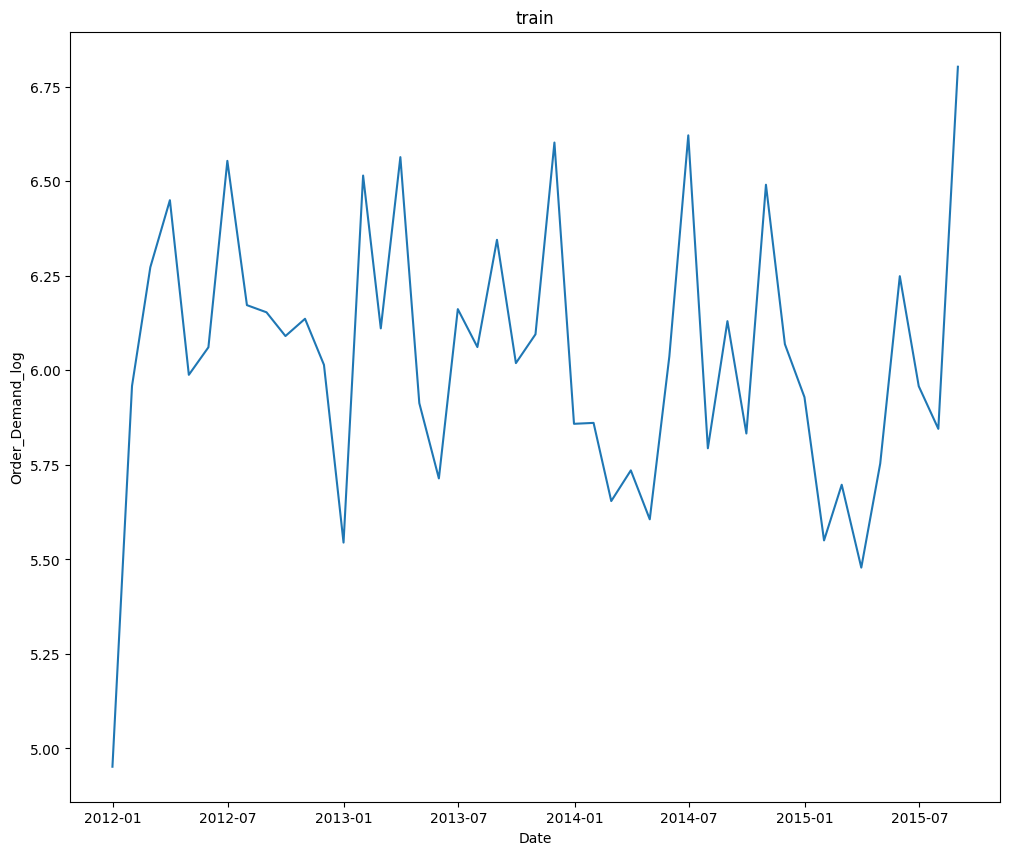

In [ ]:
fig, ax = plt.subplots(figsize = (12,10))
ax = sns.lineplot(x = train.index, y = train.Order_Demand_log)
plt.title('train')
plt.show()


In [ ]:

# Graficar ACF y PACF
def plot_acf_pacf(data, kwargs=dict()):
    f = plt.figure(figsize=(8,5))

    ax1 = f.add_subplot(121)

    plot_acf(data, zero=False, ax=ax1, **kwargs)

    ax2 = f.add_subplot(122)
    plot_pacf(data, zero=False, ax=ax2, method='ols', **kwargs)

    plt.show()

# Análisis de estacionariedad
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

    if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")


In [ ]:
# Ubicamos la muestra en 1 año para analizar la autocorrelación y la autocorrelación parcial
seasonality = train

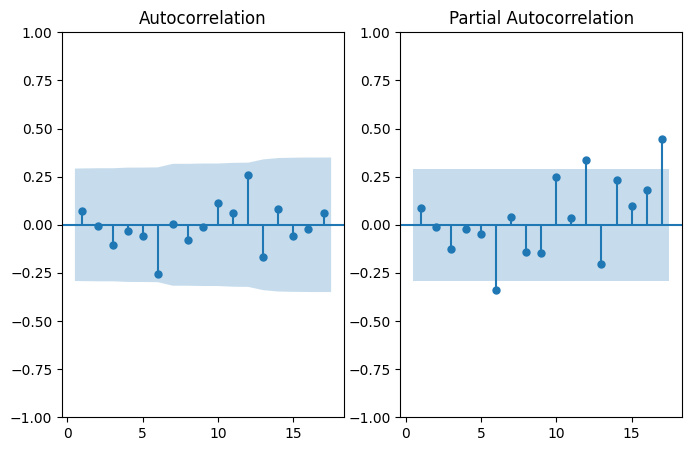

In [ ]:
# Graficamos autocorrelación
plot_acf_pacf(seasonality.dropna())

# Existe una autocorrelación a los 6-7 meses (quizá la duración de cada producto)
periods_seasonality = (6)

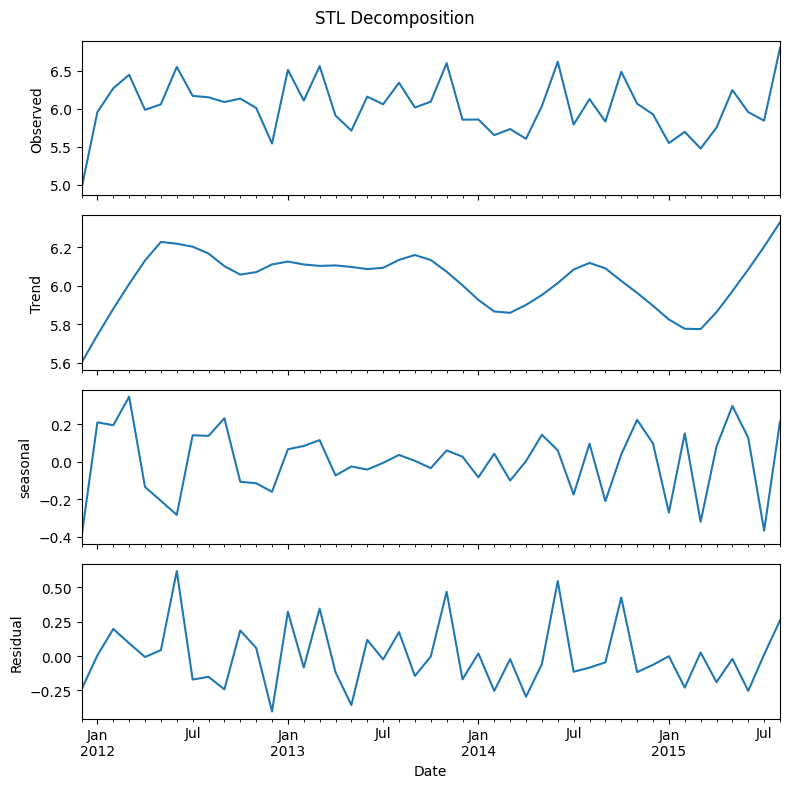

In [ ]:
# Descomposición STL a 6 y 7 meses
model = MSTL(seasonality, periods = periods_seasonality )
res = model.fit()

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(8, 8))
fig.suptitle('STL Decomposition')
res.observed.plot(ax=ax[0])
ax[0].set_ylabel('Observed')

res.trend.plot(ax=ax[1])
ax[1].set_ylabel('Trend')

res.seasonal.plot(ax=ax[2])
ax[2].set_ylabel(f'seasonal')

res.resid.plot(ax=ax[3])
ax[3].set_ylabel('Residual')

fig.tight_layout()

### Observaciones

* Existe una tendencia a la alta
* Existe seasonality aunque no es tan constante
* El residual parece aleatorio entre -20 y 20


* Espero un resultado no estacionario en la prueba de adf

In [ ]:
# Sin diferenciar arroja un resultado estacionario
seasonality = res.seasonal
# Estacionario
#adf_test(seasonality)

# Primera diferenciación
adf_test(seasonality.diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -3.434254
p-value                         0.009845
#Lags Used                     10.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64
Stationary


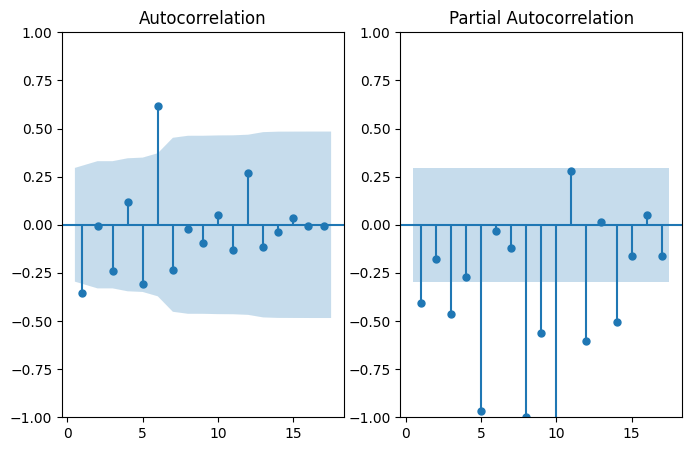

In [ ]:
# Componentes PDQS

# Al graficar la autocorrelación paricial y la autocorrelación observamos autocorrelación cada 6 meeses y una autocorrelación pacial de 5 meses.
# sin diferenciación
plot_acf_pacf(seasonality.diff().dropna())

In [ ]:
res_non_seasonal = res.observed-res.seasonal

Text(0.5, 1.0, 'Componente no estacional')

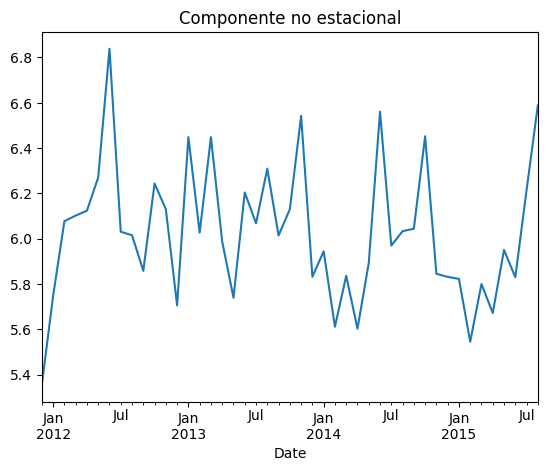

In [ ]:
res_non_seasonal.plot()
plt.title('Componente no estacional')

In [ ]:
# Sin diferenciación no es estacionaria
# adf_test(res_non_seasonal)

# Primera diferenciación
adf_test(res_non_seasonal.diff().dropna())

# Es necesaria una diferenciación para conseguir la estacionariedad

Results of Dickey-Fuller Test:
Test Statistic                 -3.581055
p-value                         0.006134
#Lags Used                      8.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64
Stationary


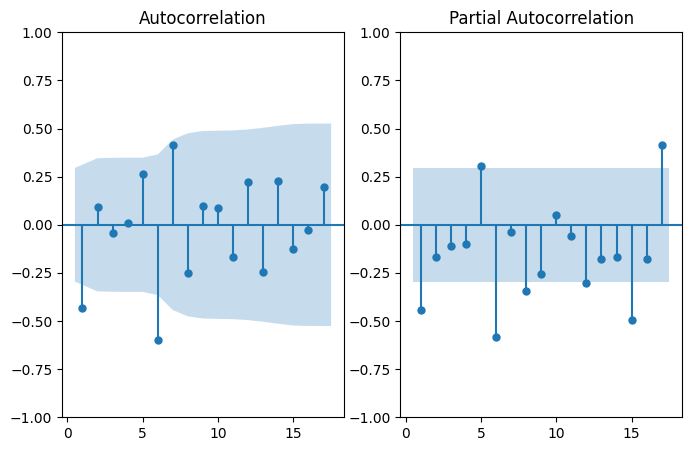

In [ ]:
# Componentes pdq

# Al graficar la autocorrelación paricial y la autocorrelación observamos autocorrelación cada 6 meeses y una autocorrelación pacialde 6 meses
# Sin diferenciación
plot_acf_pacf(res_non_seasonal.diff().dropna())

In [ ]:
import itertools

# Posibles valores en lo que pueden variar los parámetros de un SARIMAX
# Parte no estacional
p = [0, 1, 2]
d = [0, 1]
q = [0, 1, 2]
# Parte estacional
P = [0, 1, 2]
D = [0, 1]
Q = [0, 1, 2, 3]
# Tipo de tendencia
t = ['n', 'c', 't', 'ct']

# Explorar función itertools.product

# Diferentes conmbinaciones


# sarimax_params
param_no_estacionales = list(itertools.product(p, d, q))
param_estacionales = [(x[0], x[1], x[2], 3 ) for x in list(itertools.product(P, D, Q))]
sarimax_params = list(itertools.product(param_no_estacionales, param_estacionales, t))
len(sarimax_params)

1728

In [ ]:
# encuentre el 'conjunto más adecuado' de parámetros no estacionales y estacionales
n = 5
resultados = pd.DataFrame(columns=['params', 'AIC', 'BIC', 'LLF'], index=np.arange(0, 11))

i = 0
for par_no_esta, par_esta, trend in sarimax_params:
    mod = SARIMAX(
        endog=train,
        trend=trend,
        order=par_no_esta,
        seasonal_order=par_esta,
        enforce_stationarity=False
    )
    results = mod.fit(disp=False)

    resultados.loc[i, 'params'] = str((par_no_esta, par_esta, trend))
    resultados.loc[i, 'AIC'] = results.aic
    resultados.loc[i, 'BIC'] = results.bic
    resultados.loc[i, 'LLF'] = results.llf
    i += 1

    print(f'Results: Model {i}')
    print(f'AIC={results.aic}', f'BIC={results.bic}', f'Log-likelihood={results.llf}', sep='\n')


Se han truncado las últimas 5000 líneas del flujo de salida.
Results: Model 479
AIC=36.57047351378071
BIC=47.78005256707796
Log-likelihood=-10.285236756890358
Results: Model 480
AIC=38.423427581177194
BIC=51.03420401613659
Log-likelihood=-10.211713790588597
Results: Model 481
AIC=33.21965623559585
BIC=38.36037243570877
Log-likelihood=-13.609828117797923
Results: Model 482
AIC=33.290231952633185
BIC=40.14452021945041
Log-likelihood=-12.645115976316593
Results: Model 483
AIC=34.09542567125497
BIC=40.94971393807221
Log-likelihood=-13.047712835627488
Results: Model 484
AIC=34.19262179531948
BIC=42.76048212884102
Log-likelihood=-12.096310897659741
Results: Model 485
AIC=33.03553511981191
BIC=39.585879758717454
Log-likelihood=-12.517767559905954
Results: Model 486
AIC=32.72594536180268
BIC=40.91387616043461
Log-likelihood=-11.36297268090134
Results: Model 487
AIC=35.327005985051656
BIC=43.51493678368358
Log-likelihood=-12.663502992525828
Results: Model 488
AIC=35.19844738187042
BIC=45.023964

In [ ]:
resultados.sort_values(by=['AIC'], ascending=True)

params           AIC           BIC  \
1624   ((2, 1, 1), (2, 1, 2, 3), 'n')          16.0      27.97206   
1333   ((2, 0, 1), (2, 1, 1, 3), 'c')          16.0     28.210884   
67    ((0, 0, 0), (2, 0, 0, 3), 'ct')     24.226382      32.54419   
65     ((0, 0, 0), (2, 0, 0, 3), 'c')     26.619013     33.273259   
7     ((0, 0, 0), (0, 0, 1, 3), 'ct')     26.813077     33.667365   
...                               ...           ...           ...   
1631  ((2, 1, 1), (2, 1, 3, 3), 'ct')    238.643441    254.056613   
1563  ((2, 1, 1), (0, 1, 2, 3), 'ct')    250.438771    262.410832   
1626   ((2, 1, 1), (2, 1, 2, 3), 't')    251.666099    265.134667   
0      ((0, 0, 0), (0, 0, 0, 3), 'n')     285.47493     287.25912   
1555  ((2, 1, 1), (0, 1, 0, 3), 'ct')  39948.116486  39958.097855   

               LLF  
1624           0.0  
1333           0.0  
67       -7.113191  
65       -9.309506  
7        -9.406539  
...            ...  
1631   -108.321721  
1563   -117.219386  
1626    -116.83305  
0      -141.737465  
1555 -19968.058243  

[1728 rows x 4 columns]

In [ ]:
# Usando el mejor modelo
best_sarimax = SARIMAX(endog = train,
                      trend = 'n',
                      order = (2,1,1),
                      seasonal_order = (2,1,2,3))
best_sarimax = best_sarimax.fit()


In [ ]:
predictions = best_sarimax.predict(test.index[0], test.index[-1], dynamic = True)

In [ ]:
forecast = best_sarimax.get_forecast(len(test)*2)


In [ ]:
evals = pd.DataFrame()
evals['true'] = test['Order_Demand_log']
evals['pred'] = predictions



<Axes: xlabel='Date'>

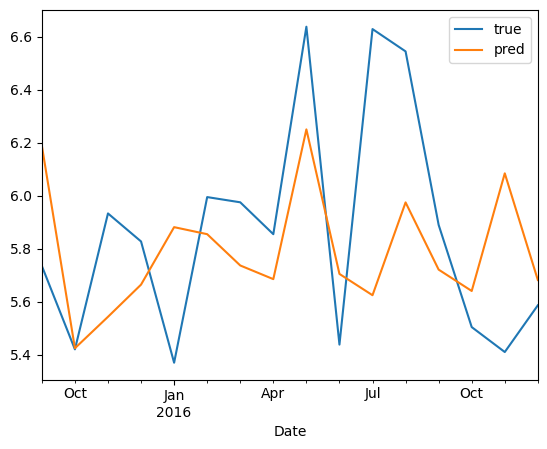

In [ ]:
evals.plot()

In [ ]:
forecast_values = forecast.summary_frame()['mean']  # Replace this with your forecasted values
lower_confidence_interval = forecast.summary_frame()['mean_ci_lower']  # Replace this with your lower confidence interval values
upper_confidence_interval = forecast.summary_frame()['mean_ci_upper']  # Replace this with your upper confidence interval values

# Generate some example data

#forecast_values = np.random.rand(10)
#lower_confidence_interval = forecast_values - 0.2
#upper_confidence_interval = forecast_values + 0.2

# Plot the forecast with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(train)
plt.plot(test)
plt.plot(predictions)
plt.legend()
plt.plot(forecast_values, label='Forecast', color='blue')
plt.fill_between(forecast_values.index, lower_confidence_interval, upper_confidence_interval, color='lightblue', alpha=0.5, label='Confidence Interval')
plt.plot(lower_confidence_interval, color='red', linestyle='dotted', label='Lower Limit')
plt.plot(upper_confidence_interval, color='red', linestyle='dotted', label='Upper Limit')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Forecast with Confidence Interval and Limits')
plt.grid(True)
plt.show()

In [ ]:
# Obtenemos un 5% de error. En general es un buen modelo
from sklearn.metrics import mean_absolute_percentage_error as mape
mape(evals['true'], evals['pred'])

0.05637705106206642

In [ ]:
# Probamos un autoarima para ver el modelo que arroja
from pmdarima.arima import auto_arima
model = auto_arima(train, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=3,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[3]             : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(0,1,0)[3]             : AIC=82.546, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[3]             : AIC=70.942, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[3]             : AIC=inf, Time=0.31 sec
 ARIMA(1,1,0)(0,1,0)[3]             : AIC=76.345, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[3]             : AIC=68.239, Time=0.09 sec
 ARIMA(1,1,0)(2,1,1)[3]             : AIC=59.638, Time=0.35 sec
 ARIMA(1,1,0)(1,1,1)[3]             : AIC=inf, Time=0.30 sec
 ARIMA(1,1,0)(2,1,2)[3]             : AIC=inf, Time=0.48 sec
 ARIMA(1,1,0)(1,1,2)[3]             : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(2,1,1)[3]             : AIC=62.604, Time=0.10 sec
 ARIMA(2,1,0)(2,1,1)[3]             : AIC=inf, Time=0.40 sec
 ARIMA(1,1,1)(2,1,1)[3]             : AIC=inf, Time=0.58 sec
 ARIMA(0,1,1)(2,1,1)[3]             : AIC=inf, Time=0.42 sec
 ARIMA(2,1,1)(2,1,1)[3]             : AIC=inf, Time=0.50 sec
 ARIMA(1,1,0)(2,1,1)[3] 

El error de autoarima es : 11.28148983782999 porciento


<Axes: xlabel='Date'>

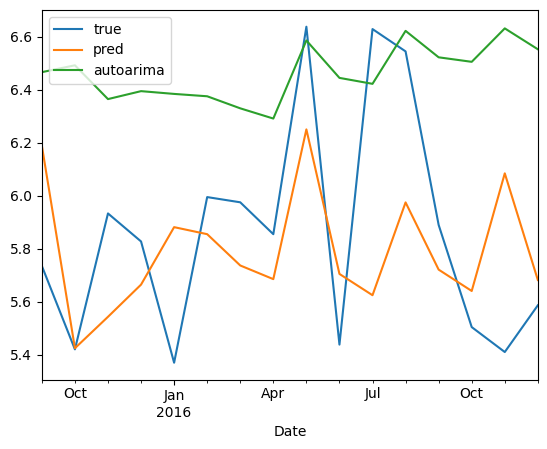

In [ ]:
auto_arima_predictions = model.predict(16)
evals['autoarima'] = auto_arima_predictions
print(f'El error de autoarima es : {mape(evals.true, evals.autoarima)*100} porciento')
evals.plot()

In [ ]:
# Para agilizar el proceso se usará para las siguientes predicciones autoarima

In [ ]:
def product_logtransformation(product):
    df = products[product]
    if len(df.index) < 10:
      return None

    # Setting the index
    df = df[['Date', 'Order_Demand']]
    df.index = df.Date

    df.drop('Date', axis = 1, inplace = True)



    # Log-transformation
    df[f'Order_Demand_log'] = np.log(df['Order_Demand'])
    #Resamplamos por mes por requrimientos del problema
    df.drop('Order_Demand', axis = 1, inplace = True)
    df = df.resample('M').mean()
    #df = df.asfreq('M')

    df['Order_Demand_log'].interpolate('pad',inplace = True)
    return df

In [ ]:
def drop_outliers(df):
    if isinstance(df, pd.core.frame.DataFrame) == False:
      return None

    # Usaré la transformación logarítmica y dropearé los outliers restantes
    Q1 = df['Order_Demand_log'].quantile(0.25)
    Q3 = df['Order_Demand_log'].quantile(0.75)
    IQR = Q3 - Q1

    # Identificar outliers
    outliers = df[(df['Order_Demand_log'] < Q1 - 1.5 * IQR) | (df['Order_Demand_log'] > Q3 + 1.5 * IQR)]

    # Mostrar los outliers
    df = df.drop(outliers.index).sort_index()
    return df

In [ ]:
def generate_model(train):
    model = auto_arima(train, start_p=0, start_q=0, m=3,
                           start_P=0, seasonal=True,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True,n_jobs=-1)
    return model

In [ ]:
def preprocessing(product):
    df = product_logtransformation(product)
    if isinstance(df, pd.core.frame.DataFrame)  == False:
      return None



    df = drop_outliers(df)


    return df


In [ ]:
def pipeline(product):
    df = preprocessing(product)

    if isinstance(df, pd.core.frame.DataFrame)  == False:
      return None

    train, test = train_test_split(df, test_size = 0.25, shuffle = False)
    train = train.asfreq('M')
    test = test.asfreq('M')
    train  = train.interpolate()
    test = test.interpolate()

    if len(train)<30:
        print(f'El producto {product} no tiene suficientes entradas')
        return None

    else:
        # Model generation
        print(product)
        model = generate_model(train)

        # Predictions and evaluations
        evals = pd.DataFrame()
        evals['true'] = test.Order_Demand_log
        auto_arima_predictions = model.predict(len(test))
        evals['autoarima'] = auto_arima_predictions

        # Idk why SARIMA would predicts some nans, so Im just going to drop them if they appear
        evals = evals.dropna()

        error = mape(evals.true, evals.autoarima)*100
        if error>100:
            return None
        print(f'El error de autoarima es : {error} porciento')

        # Not plotting for inspace notebook mesure and memory management
        #evals.plot()
        return error


In [ ]:
# Test keys for quick debugging
# Not relevant
test_keys = [list(products.keys())[a] for a in np.random.randint(90, 100, 10)]

In [ ]:
# Asimilamos los errores en una lista
errors = []
for product in products.keys():

    error = pipeline(product)
    if error != None:
        errors.append(error)



print(f'The mean error of our predictions is {np.mean(errors)}')

Product_0001
El error de autoarima es : 5.827933042628453 porciento
Product_0002
El error de autoarima es : 4.829562211111022 porciento
Product_0003
El error de autoarima es : 4.1088979784010125 porciento
Product_0004
El error de autoarima es : 5.126340423988545 porciento
Product_0005
El error de autoarima es : 8.139968277385746 porciento
Product_0006
El error de autoarima es : 6.1963863145338225 porciento
Product_0007
El error de autoarima es : 4.666333037406953 porciento
Product_0008
El error de autoarima es : 4.5475550971324985 porciento
Product_0009
El error de autoarima es : 8.700619893163388 porciento
Product_0010
El error de autoarima es : 4.934152938129614 porciento
Product_0011
El error de autoarima es : 2.247773086751128 porciento
Product_0012
El error de autoarima es : 1.1447181970906344 porciento
Product_0013
El error de autoarima es : 3.7946070009377926 porciento
Product_0014
El error de autoarima es : 3.7750800177034805 porciento
Product_0015
El error de autoarima es : 4.

# Parte 2. Series de Tiempo con Redes Neuronales (Puntuación total: 35 puntos)
Para este segundo enunciado se tendrán el dataset `Clima_Madrid.csv`. Acerca del conjunto de datos esta es la información que posee:

> 27024 entradas de la estación meteorológica de Moratalaz en Madrid, entre enero de 2019 y enero de 2022 con estas variables:
> - temperatura (°C)
> - velocidad del viento (m/s)
> - dirección del viento (en grados)
> - humedad (%)
> - presión barométrica (mb)
> - radiación solar (W/m^2)
> - precipitación (l/m^2)
>
> El objetivo es predecir la temperatura usando todo el conjunto de variables suministradas.

En esta parte del examen, se enfrentarán a un conjunto de datos de series de tiempo multivariadas. Deberán diseñar y entrenar modelos MLP, LSTM, CNN y CNN-LSTM para el pronóstico de estas series de tiempo.

a). Análisis y Preprocesamiento de Datos (30 puntos)

1. Cargue los datos y realice un análisis exploratorio (10 puntos).
2. Identifique posibles relaciones y patrones entre las variables (10 puntos).
3. Preprocese los datos para que sean adecuados para el entrenamiento de los modelos (10 puntos).

Justifique su análisis y procedimientos.

b). Modelos MLP, LSTM, CNN y CNN-LSTM (70 puntos)

4. Diseñe y entrene un modelo MLP para el pronóstico de la serie de tiempo multivariada (10 puntos).
4. Diseñe y entrene un modelo LSTM para el pronóstico de la serie de tiempo multivariada (10 puntos).
4. Diseñe y entrene un modelo CNN para el pronóstico de la serie de tiempo multivariada (10 puntos).
4. Diseñe y entrene un modelo CNN-LSTM para el pronóstico de la serie de tiempo multivariada (10 puntos).
4. Compare y analice los resultados de los diferentes modelos (10 puntos).
(Pruebe al menos 3 estructuras distintas por cada modelo. Discuta sus resultados y explique cómo podría mejorar el rendimiento de tu modelo.)

9. Evalúe el modelo en el conjunto de prueba y mide su precisión mediante la comparación del pronóstico con los valores reales. Recuerde que si alguna tranformación fue realizada debe volver los datos a su valor real para poder compararlos adecuadamente (10 puntos).
10. En base al modelo que obtuvo mejor performance, use Optuna para ajustar los hiperparámetros del modelo para obtener una precisión óptima. Evalúe el modelo en un conjunto de prueba y mida su precisión mediante la comparación del pronóstico con los valores reales (10 puntos).

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Examen extraordinario MNLP/ExamenExtraordinario/Clima_Madrid.csv', index_col='time', parse_dates=True)
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.head(5)

temperature  wind_speed  wind_direction  humidity  \
time                                                                     
2019-01-01 00:59:59          3.1        0.65            64.0      50.0   
2019-01-01 01:59:59          2.9        0.95            32.0      49.0   
2019-01-01 02:59:59          3.1        0.87            62.0      46.0   
2019-01-01 03:59:59          1.9        0.73            75.0      51.0   
2019-01-01 04:59:59          0.7        0.57            53.0      56.0   

                     barometric_pressure  solar_radiation  precipitation  
time                                                                      
2019-01-01 00:59:59                949.0              0.0            0.0  
2019-01-01 01:59:59                949.0              0.0            0.0  
2019-01-01 02:59:59                949.0              0.0            0.0  
2019-01-01 03:59:59                949.0              0.0            0.0  
2019-01-01 04:59:59                949.0              0.0            0.0

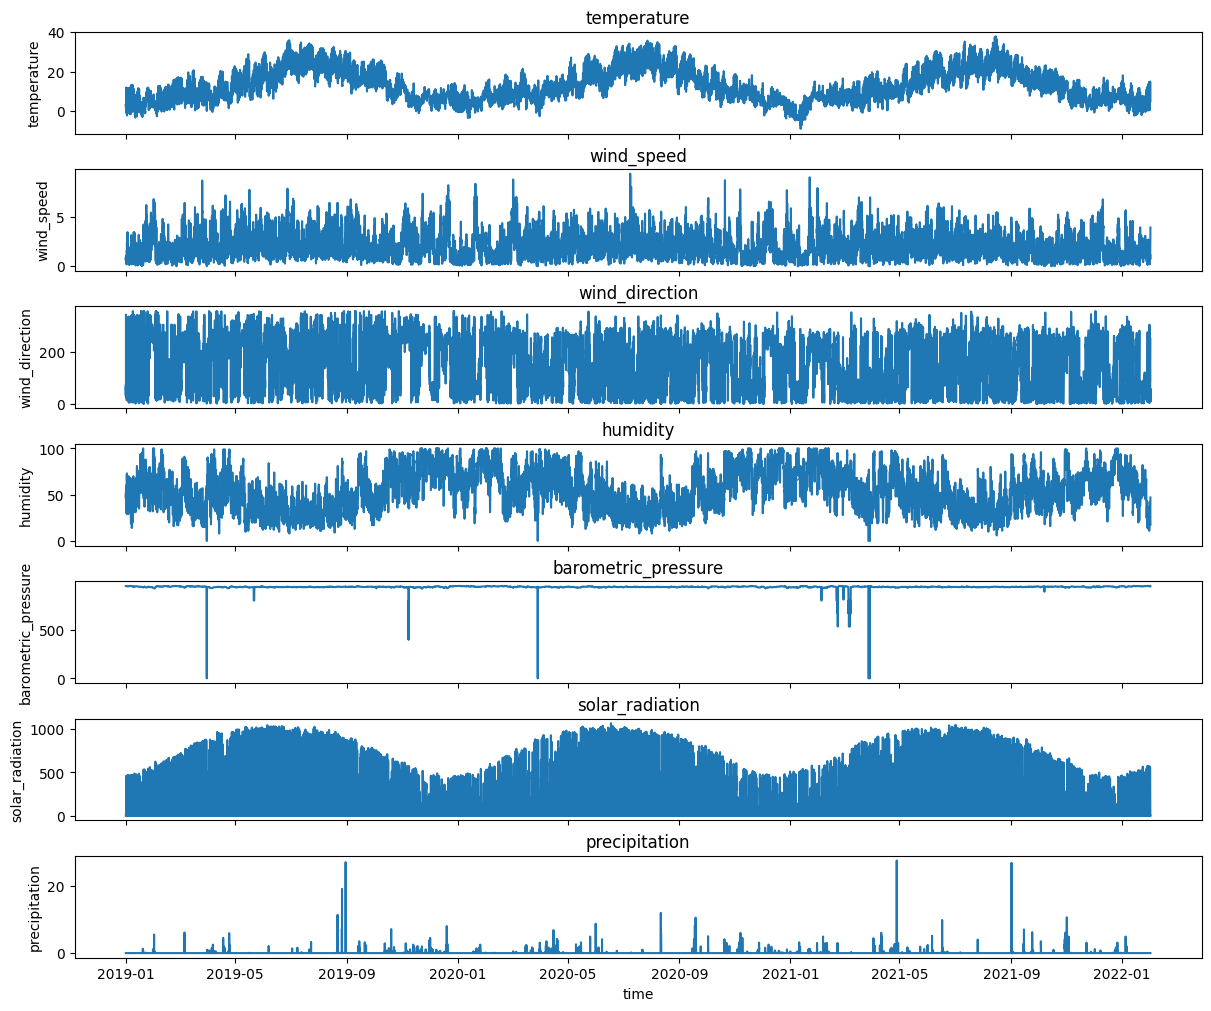

In [ ]:
fig, ax = plt.subplots(nrows=len(df.columns), sharex=True, constrained_layout = True, figsize = (12,10))
for i, col in enumerate(df.columns):
    ax[i].set_title(f'{col}')
    sns.lineplot(df[col], ax=ax[i], )
plt.show()


### Observación del lineplot
La data abarca desde 2019 hasta 2022.
* Existe una clara estacionalidad en la temperatura y la radiación solar y una estacionalidad menos obvia en la humedad.
*  Respecto a la dirección del aire y la velocidad del aire no se ve una tendencia clara pero podría haber una.
*  Probablemente la precipitación también muestre una estacionalidad pero no es observable a ojo.


<Axes: >

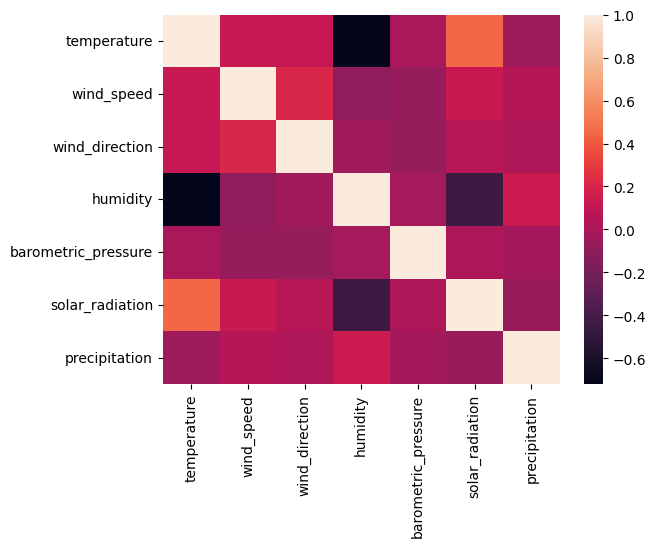

In [ ]:
# Mapa de correlación
sns.heatmap(df.corr())

### Observaciones sobre el mapa de correlación

* La correlación más alta de la temperatura es la raciación solar. Se puede asumir que a un aumento de radiación genera un aumento en la temperatura.
* La correlación más baja de la temperatura es la humedad. A un aumento en la humedad existe una disminución en la temperatura.
* También existe una relación inversa entre la humedad y la radiación solar. Esto se puede deber a los cambios de temporada en el año o a algún tipo de interacción entre la cantidad de agua en la atmósfera y cuánta radiación es desviada de ella.
* No existe otra correlación importante entre las variables a tener en cuenta

In [ ]:
df.describe()

temperature    wind_speed  wind_direction      humidity  \
count  27024.000000  27024.000000    27024.000000  27024.000000   
mean      12.817040      2.058503      142.523313     54.560909   
std        8.195516      1.253231       92.795447     22.700106   
min       -9.100000      0.000000        0.000000      0.000000   
25%        6.400000      1.100000       62.000000     36.000000   
50%       11.400000      1.800000      122.000000     53.000000   
75%       18.800000      2.770000      241.000000     72.000000   
max       37.900000      9.450000      359.000000    100.000000   

       barometric_pressure  solar_radiation  precipitation  
count         27024.000000     27024.000000   27024.000000  
mean            940.013433       197.641282       0.045811  
std              17.668038       284.877404       0.463671  
min               0.000000         0.000000       0.000000  
25%             938.000000         0.000000       0.000000  
50%             941.000000         9.000000       0.000000  
75%             944.000000       355.000000       0.000000  
max             952.000000      1068.000000      27.400000

In [ ]:
from sklearn.model_selection import train_test_split
#df = df.iloc[:, ::-1]
train, test = train_test_split(df, test_size = 0.25, shuffle = False)

In [ ]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence(sequence: np.ndarray, n_steps:int):
    X, y = list(), list()

    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps

        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x = sequence[i:end_ix, :-1]
        seq_y = sequence[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
# Selecciono arbitrariamente 10 n_steps
n_steps = 10
df = df.iloc[:, ::-1]

# Escalamiento de variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)


X_train, y_train = split_multivariate_sequence(scaled_train, n_steps = n_steps)
X_test, y_test = split_multivariate_sequence(scaled_test, n_steps = n_steps)


In [ ]:
np.unique(y_test)

array([-0.10780914,  0.13540943,  0.37862799,  0.62184655,  0.86506511,
        1.10828367,  1.35150224,  1.5947208 ,  1.83793936,  2.08115792,
        2.32437648,  2.56759504,  2.81081361,  3.29725073,  3.54046929,
        3.78368785,  4.02690642,  4.27012498,  4.51334354,  4.7565621 ,
        4.99978066,  5.24299923,  5.48621779,  5.72943635,  5.97265491,
        6.45909203,  6.7023106 ,  6.94552916,  7.18874772,  7.43196628,
        7.67518484,  8.40484053,  8.64805909,  9.13449621,  9.62093334,
        9.8641519 , 10.10737046, 11.80990039, 12.29633752, 12.53955608,
       12.78277464, 14.24208601, 14.48530458, 14.9717417 , 16.91749019,
       23.72760993, 25.67335842, 64.83154688, 66.53407681])

In [ ]:
# Datos de entrada, steps, features
n_features = X_train.shape[2]
X_train.shape, y_train.shape



((20259, 10, 6), (20259,))

In [ ]:
from keras import Model
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping

In [ ]:
erros = pd.DataFrame()

## MLP

### MLP 1

In [ ]:
# MLP 1
model = Sequential([
    Input(shape = (n_steps, n_features)),

    Dense(1000, activation = 'relu'),
    Dense(250, activation = 'relu'),
    Dense(33, activation = 'relu'),
    Dense(1)
])

callbacks = EarlyStopping(patience = 10)
adam = keras.optimizers.Adam()
model.compile(optimizer = adam, loss = 'mape')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10, 1000)          7000      
                                                                 
 dense_1 (Dense)             (None, 10, 250)           250250    
                                                                 
 dense_2 (Dense)             (None, 10, 33)            8283      
                                                                 
 dense_3 (Dense)             (None, 10, 1)             34        
                                                                 
Total params: 265,567
Trainable params: 265,567
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 1000, validation_split=0.1, callbacks = callbacks )

Epoch 1/1000
570/570 [==============================] - 4s 4ms/step - loss: 10.2402 - val_loss: 7.6013
Epoch 2/1000
570/570 [==============================] - 2s 3ms/step - loss: 6.7000 - val_loss: 8.4885
Epoch 3/1000
570/570 [==============================] - 2s 3ms/step - loss: 6.4274 - val_loss: 7.3402
Epoch 4/1000
570/570 [==============================] - 2s 3ms/step - loss: 6.4927 - val_loss: 6.6510
Epoch 5/1000
570/570 [==============================] - 2s 3ms/step - loss: 6.4669 - val_loss: 7.0067
Epoch 6/1000
570/570 [==============================] - 2s 3ms/step - loss: 6.4016 - val_loss: 6.6876
Epoch 7/1000
570/570 [==============================] - 2s 3ms/step - loss: 6.4400 - val_loss: 6.8756
Epoch 8/1000
570/570 [==============================] - 2s 3ms/step - loss: 6.3902 - val_loss: 7.0977
Epoch 9/1000
570/570 [==============================] - 2s 3ms/step - loss: 6.3977 - val_loss: 6.8597
Epoch 10/1000
570/570 [==============================] - 2s 3ms/step - loss: 6.35

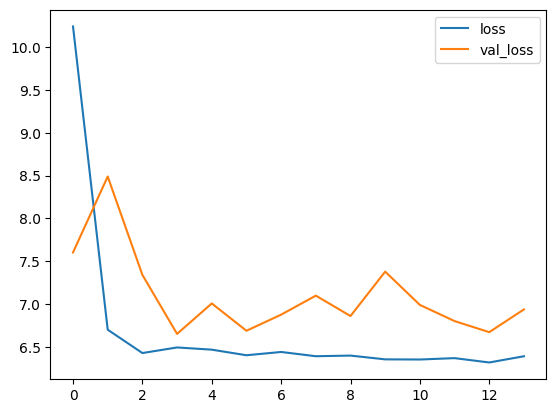

In [ ]:
# Gráfica de las pérdidas
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.legend()

In [ ]:
# Evaluación del modelo 32% de error

error = model.evaluate(x = X_test, y = y_test)
errors['MLP-1'] = error

211/211 [==============================] - 1s 3ms/step - loss: 5.6067


5.606650352478027

### MLP 2
Parece que fue un buen modelo. Para el segundo intentaré cambiar la función de pérdida y la arquitectura

In [ ]:
# MLP 2
model = Sequential([
    Input(shape = (n_steps, n_features)),
    Dense(1500, activation = 'relu'),
    Dense(1000, activation = 'relu'),
    Dense(250, activation = 'relu'),
    Dense(33, activation = 'relu'),
    Dense(1)
])

callbacks = EarlyStopping(patience = 10)
adam = keras.optimizers.Adam()
model.compile(optimizer = adam, loss = 'mse', metrics = 'mape')

In [ ]:
history = model.fit(X_train, y_train, epochs = 1000, validation_split=0.1, callbacks = callbacks )

Epoch 1/1000
570/570 [==============================] - 3s 4ms/step - loss: 1.0302 - mape: 100.3322 - val_loss: 0.7422 - val_mape: 92.8569
Epoch 2/1000
570/570 [==============================] - 2s 4ms/step - loss: 1.0293 - mape: 99.0450 - val_loss: 0.7423 - val_mape: 97.2001
Epoch 3/1000
570/570 [==============================] - 2s 4ms/step - loss: 1.0293 - mape: 101.2033 - val_loss: 0.7424 - val_mape: 93.5081
Epoch 4/1000
570/570 [==============================] - 2s 4ms/step - loss: 1.0293 - mape: 97.8371 - val_loss: 0.7422 - val_mape: 96.7322
Epoch 5/1000
570/570 [==============================] - 2s 4ms/step - loss: 1.0292 - mape: 100.3689 - val_loss: 0.7424 - val_mape: 92.5845
Epoch 6/1000
570/570 [==============================] - 2s 4ms/step - loss: 1.0293 - mape: 98.5493 - val_loss: 0.7423 - val_mape: 95.2093
Epoch 7/1000
570/570 [==============================] - 2s 4ms/step - loss: 1.0293 - mape: 97.2212 - val_loss: 0.7422 - val_mape: 98.8796
Epoch 8/1000
570/570 [=========

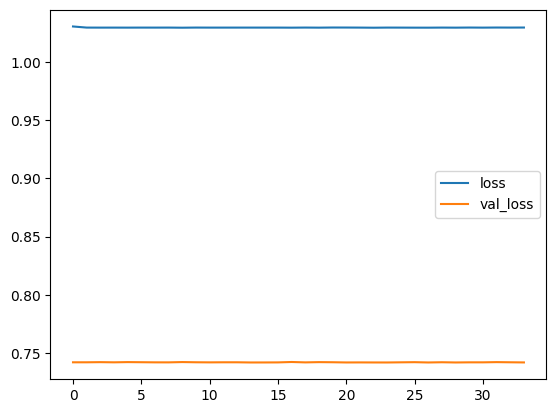

In [ ]:
# Gráfica de las pérdidas
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.legend()

In [ ]:
# Evaluación del modelo 31.5% de error

error = model.evaluate(x = X_test, y = y_test)[1]
errors['MLP-2'] = error

211/211 [==============================] - 1s 3ms/step - loss: 2.0897 - mape: 102.7353


[2.0896902084350586, 102.73526000976562]

### MLP 3


Decidí modificar el tamaño de los n_steps  y reducir el tamaño de la arquitectura

In [ ]:
# Selecciono arbitrariamente 3 n_steps
n_steps = 3
#df = df.iloc[:, ::-1]

# Escalamiento de variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)


X_train, y_train = split_multivariate_sequence(scaled_train, n_steps = n_steps)
X_test, y_test = split_multivariate_sequence(scaled_test, n_steps = n_steps)



In [ ]:
# MLP 3
model = Sequential([
    Input(shape = (n_steps, n_features)),
    Dense(1000, activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(1)
])

callbacks = EarlyStopping(patience = 10)
adam = keras.optimizers.Adam()
model.compile(optimizer = adam, loss = 'mse', metrics = 'mape')

In [ ]:
history = model.fit(X_train, y_train, epochs = 1000, validation_split=0.1, callbacks = callbacks )

Epoch 1/1000
570/570 [==============================] - 3s 4ms/step - loss: 1.0296 - mape: 99.7461 - val_loss: 0.7419 - val_mape: 97.0700
Epoch 2/1000
570/570 [==============================] - 2s 3ms/step - loss: 1.0289 - mape: 99.5014 - val_loss: 0.7419 - val_mape: 94.7396
Epoch 3/1000
570/570 [==============================] - 2s 3ms/step - loss: 1.0289 - mape: 95.1664 - val_loss: 0.7417 - val_mape: 117.6101
Epoch 4/1000
570/570 [==============================] - 2s 3ms/step - loss: 1.0291 - mape: 102.7722 - val_loss: 0.7419 - val_mape: 94.3321
Epoch 5/1000
570/570 [==============================] - 2s 3ms/step - loss: 1.0289 - mape: 101.5664 - val_loss: 0.7420 - val_mape: 91.1214
Epoch 6/1000
570/570 [==============================] - 2s 3ms/step - loss: 1.0290 - mape: 95.2087 - val_loss: 0.7411 - val_mape: 101.8844
Epoch 7/1000
570/570 [==============================] - 2s 4ms/step - loss: 1.0290 - mape: 98.3120 - val_loss: 0.7413 - val_mape: 106.3824
Epoch 8/1000
570/570 [=======

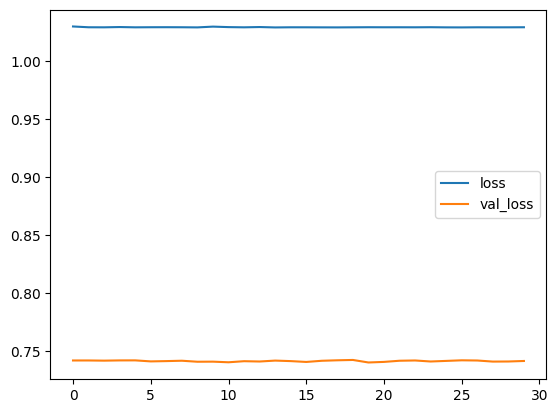

In [ ]:
# Gráfica de las pérdidas
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.legend()

In [ ]:
# Evaluación del modelo 248274750% de error

error = model.evaluate(x = X_test, y = y_test)[1]
errors['MLP-3'] = error

212/212 [==============================] - 1s 2ms/step - loss: 2.0857 - mape: 98.6266


[2.0857393741607666, 98.62657928466797]

## LSTM

In [ ]:
from keras.layers import LSTM

### LSTM 1
Decidí volver a usar mape como la función de pérdida ya que es el modelo que mejor resultados ha dado

In [ ]:
# LSTM1
model = Sequential()
model.add(LSTM(100,
               activation='relu',
               return_sequences=True,
               input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))


callbacks = EarlyStopping(patience = 10)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mape')

# fit model
history = model.fit(X_train, y_train, epochs=50, verbose=1, validation_split=0.1, callbacks = callbacks)

Epoch 1/50
570/570 [==============================] - 9s 12ms/step - loss: 9.0469 - val_loss: 7.8454
Epoch 2/50
570/570 [==============================] - 6s 11ms/step - loss: 6.6938 - val_loss: 7.0697
Epoch 3/50
570/570 [==============================] - 6s 11ms/step - loss: 6.5458 - val_loss: 7.0658
Epoch 4/50
570/570 [==============================] - 6s 11ms/step - loss: 6.4619 - val_loss: 7.1833
Epoch 5/50
570/570 [==============================] - 6s 11ms/step - loss: 6.4097 - val_loss: 7.0102
Epoch 6/50
570/570 [==============================] - 6s 11ms/step - loss: 6.3834 - val_loss: 7.1458
Epoch 7/50
570/570 [==============================] - 6s 11ms/step - loss: 6.4417 - val_loss: 7.5950
Epoch 8/50
570/570 [==============================] - 6s 11ms/step - loss: 6.4424 - val_loss: 6.8256
Epoch 9/50
570/570 [==============================] - 6s 11ms/step - loss: 6.5091 - val_loss: 6.8383
Epoch 10/50
570/570 [==============================] - 6s 11ms/step - loss: 6.4574 - val_lo

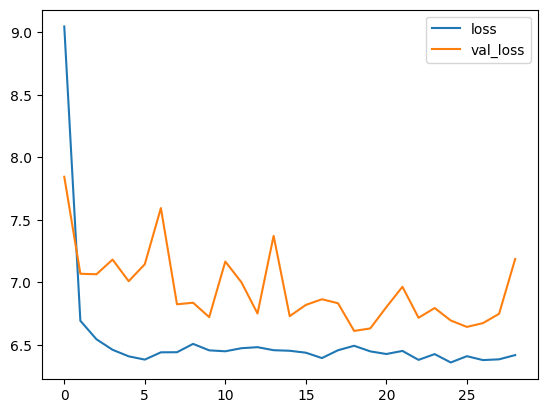

In [ ]:
# Gráfica de las pérdidas
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.legend()

In [ ]:
# Evaluación del modelo 13.2% de error

error = model.evaluate(x = X_test, y = y_test)
errors['LSTM-1'] = error

212/212 [==============================] - 1s 3ms/step - loss: 5.8917


5.891749858856201



### LSTM 2

Cambio de arquitectura, n_steps = 24 (un dia)

In [ ]:
# LSTM2
# Cambio de el tamaño de los steps
# Se seleccionan 24 hrs para que la ventana sea de 1 dia
n_steps = 24
#df = df.iloc[:, ::-1]

# Escalamiento de variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_df = scaler.fit_transform(train)
scaled_test = scaler.transform(test)


X_train, y_train = split_multivariate_sequence(scaled_train, n_steps = n_steps)
X_test, y_test = split_multivariate_sequence(scaled_test, n_steps = n_steps)






# Primer aproach con mape
model = Sequential()
model.add(LSTM(100,
               activation='relu',
               return_sequences=True,
               input_shape=(n_steps, n_features)))
model.add(LSTM(30,
               activation='relu',
               return_sequences=True,
               input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu'))

model.add(Dense(100, activation = 'relu'))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(1))


callbacks = EarlyStopping(patience = 10)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mape')

# fit model
history = model.fit(X_train, y_train, epochs=50, verbose=1, validation_split=0.1, callbacks = callbacks)

Epoch 1/50
570/570 [==============================] - 55s 92ms/step - loss: 8.0128 - val_loss: 9.3099
Epoch 2/50
570/570 [==============================] - 52s 91ms/step - loss: 7.1654 - val_loss: 7.1495
Epoch 3/50
570/570 [==============================] - 52s 91ms/step - loss: 6.9969 - val_loss: 9.4394
Epoch 4/50
570/570 [==============================] - 52s 91ms/step - loss: 6.9174 - val_loss: 7.2019
Epoch 5/50
570/570 [==============================] - 52s 91ms/step - loss: 6.7872 - val_loss: 7.2401
Epoch 6/50
570/570 [==============================] - 52s 91ms/step - loss: 6.8417 - val_loss: 7.5554
Epoch 7/50
570/570 [==============================] - 52s 91ms/step - loss: 6.8156 - val_loss: 7.1742
Epoch 8/50
570/570 [==============================] - 52s 91ms/step - loss: 6.7955 - val_loss: 7.4792
Epoch 9/50
570/570 [==============================] - 52s 91ms/step - loss: 6.7528 - val_loss: 8.8499
Epoch 10/50
570/570 [==============================] - 52s 91ms/step - loss: 6.686

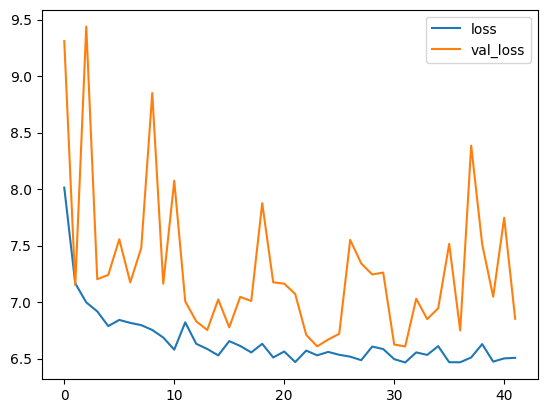

In [ ]:
# Gráfica de las pérdidas
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.legend()

In [ ]:
# Evaluación del modelo 13.2% de error

error = model.evaluate(x = X_test, y = y_test)
errors['LSTM-2'] = error

211/211 [==============================] - 2s 12ms/step - loss: 5.4707


5.470728397369385

### LSTM3

Parece que funcionó mejor la ventana de 3. Agrego también una capa dropout.

In [ ]:
# LSTM3
n_steps = 3
#df = df.iloc[:, ::-1]

# Escalamiento de variables
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout
scaler = StandardScaler()

scaled_df = scaler.fit_transform(train)
scaled_test = scaler.transform(test)


X_train, y_train = split_multivariate_sequence(scaled_train, n_steps = n_steps)
X_test, y_test = split_multivariate_sequence(scaled_test, n_steps = n_steps)






# Primer aproach con mape
model = Sequential()
model.add(LSTM(100,
               activation='relu',
               return_sequences=True,
               input_shape=(n_steps, n_features)))
model.add(LSTM(30,
               activation='relu',
               return_sequences=True,
               input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(1))


callbacks = EarlyStopping(patience = 15)
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mape')

# fit model
history = model.fit(X_train, y_train, epochs=50, verbose=1, validation_split=0.1, callbacks = callbacks)

Epoch 1/50
570/570 [==============================] - 13s 17ms/step - loss: 8.3841 - val_loss: 9.3992
Epoch 2/50
570/570 [==============================] - 9s 16ms/step - loss: 7.2056 - val_loss: 8.6308
Epoch 3/50
570/570 [==============================] - 9s 16ms/step - loss: 7.0305 - val_loss: 6.7189
Epoch 4/50
570/570 [==============================] - 9s 16ms/step - loss: 6.9396 - val_loss: 7.7777
Epoch 5/50
570/570 [==============================] - 9s 17ms/step - loss: 6.8513 - val_loss: 7.3687
Epoch 6/50
570/570 [==============================] - 10s 17ms/step - loss: 6.8265 - val_loss: 7.2432
Epoch 7/50
570/570 [==============================] - 9s 16ms/step - loss: 6.7311 - val_loss: 6.9143
Epoch 8/50
570/570 [==============================] - 9s 17ms/step - loss: 6.7816 - val_loss: 7.1961
Epoch 9/50
570/570 [==============================] - 9s 17ms/step - loss: 6.7621 - val_loss: 7.8464
Epoch 10/50
570/570 [==============================] - 9s 16ms/step - loss: 6.7379 - val_

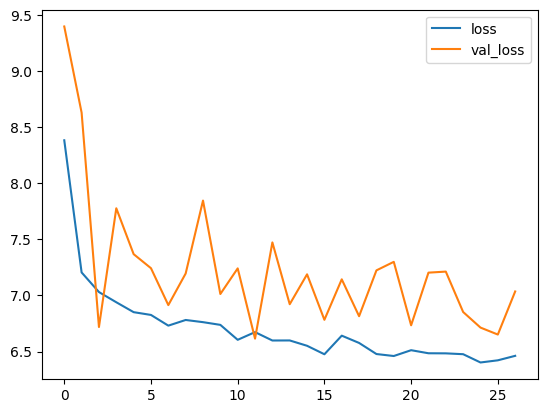

In [ ]:
# Gráfica de las pérdidas
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.legend()

In [ ]:
# Evaluación del modelo 13.2% de error

error = model.evaluate(x = X_test, y = y_test)
errors['LSTM-3'] = error

212/212 [==============================] - 1s 3ms/step - loss: 5.7344


5.734404563903809

## CNN

### CNN 1

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

In [ ]:
# Definir el modelo
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics= 'mape')

callbacks = EarlyStopping(patience = 10)
# fit model
history = model.fit(X_train, y_train, epochs=2000, verbose=1, callbacks = callbacks, validation_split = 0.1)


Epoch 1/2000
570/570 [==============================] - 3s 3ms/step - loss: 0.9857 - mape: 125.1893 - val_loss: 0.7353 - val_mape: 155.0869
Epoch 2/2000
570/570 [==============================] - 2s 3ms/step - loss: 0.9309 - mape: 131.8551 - val_loss: 0.7405 - val_mape: 216.3728
Epoch 3/2000
570/570 [==============================] - 2s 3ms/step - loss: 0.9011 - mape: 136.8677 - val_loss: 0.7154 - val_mape: 149.7102
Epoch 4/2000
570/570 [==============================] - 2s 3ms/step - loss: 0.8706 - mape: 130.5535 - val_loss: 0.6036 - val_mape: 142.9851
Epoch 5/2000
570/570 [==============================] - 2s 3ms/step - loss: 0.8282 - mape: 127.5073 - val_loss: 0.6268 - val_mape: 162.5443
Epoch 6/2000
570/570 [==============================] - 2s 3ms/step - loss: 0.7942 - mape: 131.4331 - val_loss: 0.7090 - val_mape: 164.4135
Epoch 7/2000
570/570 [==============================] - 2s 3ms/step - loss: 0.7599 - mape: 126.8149 - val_loss: 0.6180 - val_mape: 141.1346
Epoch 8/2000
570/570

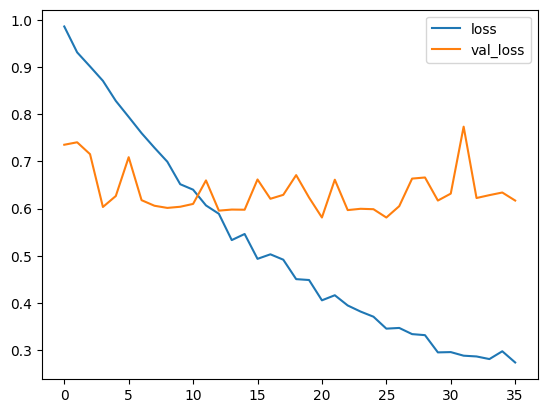

In [ ]:
# Gráfica de las pérdidas
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.legend()

In [ ]:
# Evaluación del modelo 13.2% de error

error = model.evaluate(x = X_test, y = y_test)[1]
errors['CNN-1'] = error

212/212 [==============================] - 0s 2ms/step - loss: 1.9352 - mape: 99.2326


[1.9352004528045654, 99.23259735107422]

### Conv2
Cambiaré de nuevo la función de pérdida, agregaré dropout y más paciencia

In [ ]:
# Definir el modelo
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mape')

callbacks = EarlyStopping(patience = 20)
# fit model
history = model.fit(X_train, y_train, epochs=2000, verbose=1, callbacks = callbacks, validation_split = 0.1)


Epoch 1/2000
570/570 [==============================] - 3s 3ms/step - loss: 45.1575 - val_loss: 21.8836
Epoch 2/2000
570/570 [==============================] - 2s 3ms/step - loss: 14.4279 - val_loss: 13.9169
Epoch 3/2000
570/570 [==============================] - 2s 3ms/step - loss: 9.3358 - val_loss: 14.0933
Epoch 4/2000
570/570 [==============================] - 2s 3ms/step - loss: 7.6285 - val_loss: 14.3943
Epoch 5/2000
570/570 [==============================] - 2s 3ms/step - loss: 6.9765 - val_loss: 15.2874
Epoch 6/2000
570/570 [==============================] - 2s 3ms/step - loss: 6.8039 - val_loss: 9.9850
Epoch 7/2000
570/570 [==============================] - 2s 3ms/step - loss: 6.7403 - val_loss: 9.5237
Epoch 8/2000
570/570 [==============================] - 2s 3ms/step - loss: 6.6560 - val_loss: 11.9451
Epoch 9/2000
570/570 [==============================] - 2s 3ms/step - loss: 6.6517 - val_loss: 7.9633
Epoch 10/2000
570/570 [==============================] - 2s 3ms/step - los

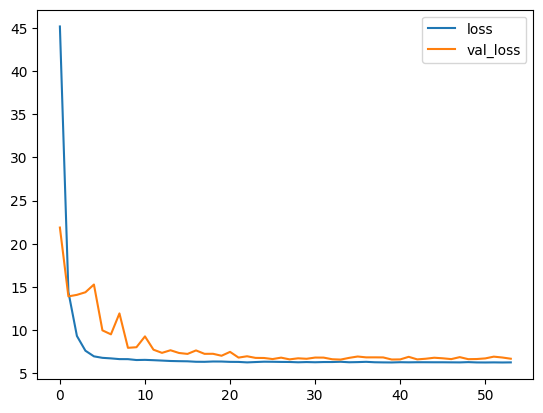

In [ ]:
# Gráfica de las pérdidas
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.legend()

In [ ]:
#   Error
error = model.evaluate(x = X_test, y = y_test)
errors['CNN-2'] = error

212/212 [==============================] - 0s 2ms/step - loss: 5.3972


5.397233963012695

### Conv3
Modificación de la arquitectura

In [ ]:
# Definir el modelo
model = Sequential()
model.add(Conv1D(100, 2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D())


model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mape')

callbacks = EarlyStopping(patience = 25)
# fit model
history = model.fit(X_train, y_train, epochs=2000, verbose=1, callbacks = callbacks, validation_split = 0.1)


Epoch 1/2000
570/570 [==============================] - 3s 3ms/step - loss: 35.6623 - val_loss: 17.2422
Epoch 2/2000
570/570 [==============================] - 2s 3ms/step - loss: 12.7698 - val_loss: 13.4434
Epoch 3/2000
570/570 [==============================] - 2s 3ms/step - loss: 8.6652 - val_loss: 14.1761
Epoch 4/2000
570/570 [==============================] - 2s 3ms/step - loss: 7.4468 - val_loss: 13.7898
Epoch 5/2000
570/570 [==============================] - 2s 3ms/step - loss: 7.0500 - val_loss: 10.5691
Epoch 6/2000
570/570 [==============================] - 2s 3ms/step - loss: 6.8743 - val_loss: 8.9463
Epoch 7/2000
570/570 [==============================] - 2s 3ms/step - loss: 6.9983 - val_loss: 9.7784
Epoch 8/2000
570/570 [==============================] - 2s 3ms/step - loss: 6.7752 - val_loss: 10.8235
Epoch 9/2000
570/570 [==============================] - 2s 3ms/step - loss: 6.7405 - val_loss: 15.9694
Epoch 10/2000
570/570 [==============================] - 2s 3ms/step - lo

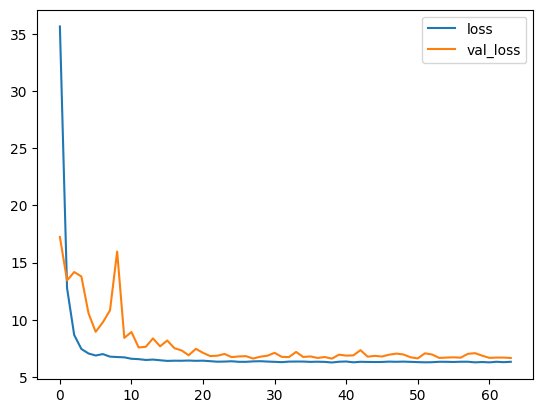

In [ ]:
# Gráfica de las pérdidas
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.legend()

In [ ]:
# Evaluación del modelo 13.2% de error

error = model.evaluate(x = X_test, y = y_test)
errors['CNN-3'] = error

212/212 [==============================] - 0s 2ms/step - loss: 5.3503


5.350337028503418

## Conv-LSTM

### Conv-LSTM1

In [ ]:
# Selección de n_steps en 24
n_steps = 24
df = df.iloc[:, ::-1]

# Escalamiento de variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)


X_train, y_train = split_multivariate_sequence(scaled_train, n_steps = n_steps)
X_test, y_test = split_multivariate_sequence(scaled_test, n_steps = n_steps)


In [ ]:
from keras.layers import ConvLSTM2D, ConvLSTM1D, TimeDistributed

In [ ]:
n_timesteps, n_features = X_train.shape[1], X_train.shape[-1]
n_timesteps, n_features

(24, 6)

In [ ]:
# Timesteps 24/8 = 3
n_length = 8
n_steps = 3
X_train = X_train.reshape((X_train.shape[0], n_steps, n_length, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_length, n_features))

In [ ]:
model = Sequential()
model.add(TimeDistributed(Conv1D(64, 3, activation='relu'), input_shape=(None, n_length, n_features)))
model.add(TimeDistributed(Conv1D(64, 3, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D()))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mape', optimizer='adam')

callbacks = EarlyStopping(patience=15)

In [ ]:
history  = model.fit(X_train, y_train, epochs=1000, verbose=1, validation_split=0.1, callbacks=callbacks)

Epoch 1/1000
570/570 [==============================] - 3s 5ms/step - loss: 6.4739 - val_loss: 6.7664
Epoch 2/1000
570/570 [==============================] - 3s 5ms/step - loss: 6.5020 - val_loss: 6.6133
Epoch 3/1000
570/570 [==============================] - 3s 5ms/step - loss: 6.4477 - val_loss: 7.4972
Epoch 4/1000
570/570 [==============================] - 3s 5ms/step - loss: 6.4986 - val_loss: 6.9751
Epoch 5/1000
570/570 [==============================] - 3s 5ms/step - loss: 6.4006 - val_loss: 6.6373
Epoch 6/1000
570/570 [==============================] - 3s 5ms/step - loss: 6.4900 - val_loss: 6.9332
Epoch 7/1000
570/570 [==============================] - 3s 5ms/step - loss: 6.3874 - val_loss: 6.8191
Epoch 8/1000
570/570 [==============================] - 3s 5ms/step - loss: 6.4523 - val_loss: 6.6101
Epoch 9/1000
570/570 [==============================] - 3s 5ms/step - loss: 6.4243 - val_loss: 6.7518
Epoch 10/1000
570/570 [==============================] - 3s 5ms/step - loss: 6.451

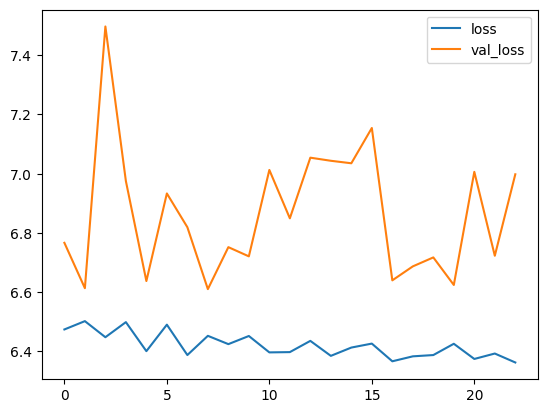

In [ ]:
# Gráfica de las pérdidas
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.legend()

In [ ]:
# Evaluación del modelo 13.2% de error

error = model.evaluate(x = X_test, y = y_test)
errors['ConvLSTM-1'] = error

211/211 [==============================] - 1s 2ms/step - loss: 5.6177


5.617688179016113

### ConvLSTM2


Cambio de arquitectura

In [ ]:
X_train = X_train.reshape((X_train.shape[0], n_steps, 1, n_length, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, 1, n_length, n_features))

In [ ]:
model = Sequential()
model.add(ConvLSTM2D(64, (1,3),
                      activation='relu',
                      input_shape=(n_steps, 1, n_length,n_features)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mape', optimizer='adam')

callbacks = EarlyStopping(patience=25)

# Ajustar el modelo
history = model.fit(X_train, y_train, epochs=1000, verbose=1, callbacks=callbacks, validation_split=0.1)

Epoch 1/1000
570/570 [==============================] - 14s 17ms/step - loss: 13.6442 - val_loss: 8.7916
Epoch 2/1000
570/570 [==============================] - 9s 17ms/step - loss: 6.7461 - val_loss: 7.7144
Epoch 3/1000
570/570 [==============================] - 9s 17ms/step - loss: 6.4687 - val_loss: 8.1639
Epoch 4/1000
570/570 [==============================] - 9s 17ms/step - loss: 6.4862 - val_loss: 7.1025
Epoch 5/1000
570/570 [==============================] - 9s 17ms/step - loss: 6.3715 - val_loss: 7.2815
Epoch 6/1000
570/570 [==============================] - 9s 17ms/step - loss: 6.4191 - val_loss: 6.7793
Epoch 7/1000
570/570 [==============================] - 10s 17ms/step - loss: 6.4193 - val_loss: 7.0701
Epoch 8/1000
570/570 [==============================] - 9s 17ms/step - loss: 6.3290 - val_loss: 7.0616
Epoch 9/1000
570/570 [==============================] - 10s 17ms/step - loss: 6.4273 - val_loss: 6.6626
Epoch 10/1000
570/570 [==============================] - 9s 17ms/step

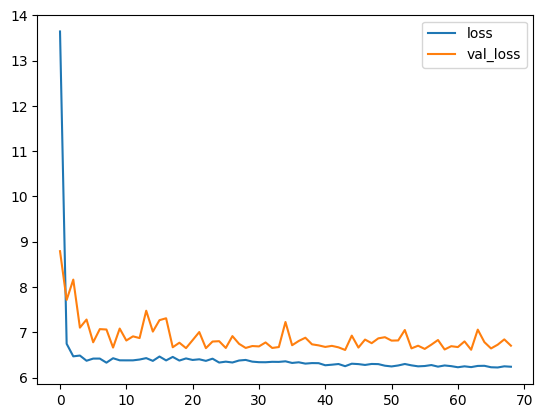

In [ ]:
# Gráfica de las pérdidas
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.legend()

In [ ]:
# Evaluación del modelo 13.2% de error

error = model.evaluate(x = X_test, y = y_test)
errors['ConvLSTM-2'] = error

211/211 [==============================] - 1s 4ms/step - loss: 5.3223


5.322294235229492

### ConvLSTM3

Voy a aumentar el tamaño del modelo

In [ ]:
model = Sequential()
model.add(ConvLSTM2D(128, (1,3),
                      activation='relu',
                      input_shape=(n_steps, 1, n_length,n_features)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mape', optimizer='adam')

callbacks = EarlyStopping(patience=25)

# Ajustar el modelo
history = model.fit(X_train, y_train, epochs=1000, verbose=1, callbacks=callbacks, validation_split=0.1)

Epoch 1/1000
570/570 [==============================] - 14s 18ms/step - loss: 9.1893 - val_loss: 7.3392
Epoch 2/1000
570/570 [==============================] - 10s 18ms/step - loss: 6.4919 - val_loss: 6.9592
Epoch 3/1000
570/570 [==============================] - 10s 17ms/step - loss: 6.4247 - val_loss: 7.1296
Epoch 4/1000
570/570 [==============================] - 10s 17ms/step - loss: 6.3887 - val_loss: 7.4266
Epoch 5/1000
570/570 [==============================] - 10s 17ms/step - loss: 6.4473 - val_loss: 7.4563
Epoch 6/1000
570/570 [==============================] - 10s 18ms/step - loss: 6.4017 - val_loss: 6.9476
Epoch 7/1000
570/570 [==============================] - 10s 17ms/step - loss: 6.3699 - val_loss: 6.7774
Epoch 8/1000
570/570 [==============================] - 10s 18ms/step - loss: 6.3701 - val_loss: 6.9017
Epoch 9/1000
570/570 [==============================] - 10s 17ms/step - loss: 6.3411 - val_loss: 7.0067
Epoch 10/1000
570/570 [==============================] - 10s 18m

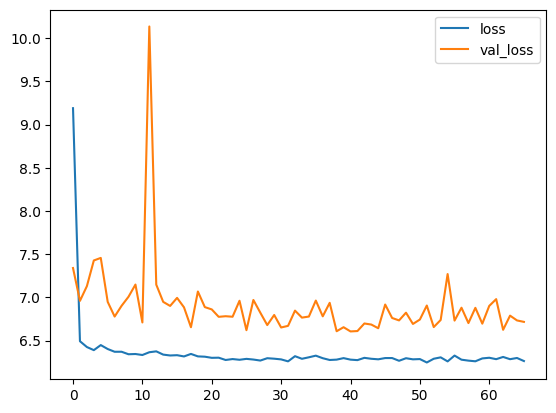

In [ ]:
# Gráfica de las pérdidas
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.legend()

In [ ]:
# Evaluación del modelo 13.2% de error

error = model.evaluate(x = X_test, y = y_test)
errors['ConvLSTM-3'] = error

211/211 [==============================] - 1s 4ms/step - loss: 5.3352


5.335172176361084

## Resultados
El mejor modelo obtenido fue el segundo convolucional con un error de 5.32%
Procederé a probar optuna para ver si logro mejorar los resultados

In [ ]:
# Display errors

In [ ]:
import optuna
import tensorflow as tf

In [ ]:
def objective(trial):
    global X_train, y_train, X_test

    # Definir los hiperparámetros a ajustar
    batch_size = trial.suggest_int('batch_size', 32, 128)
    filters = trial.suggest_int('filters', 32, 128)
    kernel_size = trial.suggest_int('kernel_size', 2, 3)

    num_neurons = trial.suggest_int('num_neurons', 16, 256)
    dropout_rate = trial.suggest_float('rate', 0.0, 0.7)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1)
    epochs = trial.suggest_int('epochs', 10, 200)
    verbose = 0

    n_timesteps, n_features = X_train.shape[1], X_train.shape[-1]

    # reshape data a time steps of sub-sequences
    n_steps, n_length = 8,3
    X_train = X_train.reshape((X_train.shape[0], n_steps, 1, n_length, n_features))
    X_test = X_test.reshape((X_test.shape[0], n_steps, 1, n_length, n_features))



    # Definir el modelo
    model = Sequential()
    model.add(ConvLSTM2D(filters, (1, kernel_size),
                         activation='relu',
                         input_shape=(n_steps, 1, n_length,n_features)))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # Compilar el modelo con los hiperparámetros ajustados
    model.compile(loss='mape',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
                 )

    earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=15)

    # Ajustar el modelo
    model.fit(X_train,
              y_train,
              epochs=epochs,
              validation_split=.1,
              shuffle=False,
              batch_size=batch_size,
              verbose=0,
              callbacks=[earlystop]
             )
    # evaluate model
    error = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

    return error

# Definir el objeto de estudio de Optuna y ejecutar la búsqueda de hiperparámetros
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Imprimir los resultados
print('Best trial:', study.best_trial.params)
print('Best validation loss:', study.best_trial.value)


[I 2023-08-03 03:49:04,558] A new study created in memory with name: no-name-44725c7d-a99d-4222-9f93-735b1a664e11


100/100 [==============================] - 1s 7ms/step - loss: 9.4628


[I 2023-08-03 03:54:38,406] Trial 0 finished with value: 9.462772369384766 and parameters: {'batch_size': 68, 'filters': 55, 'kernel_size': 2, 'num_neurons': 102, 'rate': 0.6917631837577869, 'learning_rate': 0.026113854971506072, 'epochs': 188}. Best is trial 0 with value: 9.462772369384766.


100/100 [==============================] - 1s 6ms/step - loss: 27.7486


[I 2023-08-03 03:59:55,281] Trial 1 finished with value: 27.748565673828125 and parameters: {'batch_size': 68, 'filters': 40, 'kernel_size': 2, 'num_neurons': 165, 'rate': 0.3461097231670119, 'learning_rate': 0.0908891928285524, 'epochs': 32}. Best is trial 0 with value: 9.462772369384766.


144/144 [==============================] - 1s 5ms/step - loss: 5.6356


[I 2023-08-03 04:15:19,915] Trial 2 finished with value: 5.635581970214844 and parameters: {'batch_size': 47, 'filters': 79, 'kernel_size': 3, 'num_neurons': 159, 'rate': 0.28142477866010956, 'learning_rate': 0.0017265077626020774, 'epochs': 155}. Best is trial 2 with value: 5.635581970214844.


90/90 [==============================] - 1s 5ms/step - loss: 19.0857


[I 2023-08-03 04:17:49,754] Trial 3 finished with value: 19.08570671081543 and parameters: {'batch_size': 75, 'filters': 107, 'kernel_size': 3, 'num_neurons': 22, 'rate': 0.06855569910737502, 'learning_rate': 0.08973943956373276, 'epochs': 160}. Best is trial 2 with value: 5.635581970214844.


69/69 [==============================] - 0s 6ms/step - loss: 5.7081


[I 2023-08-03 04:20:36,744] Trial 4 finished with value: 5.7081074714660645 and parameters: {'batch_size': 98, 'filters': 51, 'kernel_size': 2, 'num_neurons': 227, 'rate': 0.5233631406057772, 'learning_rate': 0.05295766407644167, 'epochs': 59}. Best is trial 2 with value: 5.635581970214844.


94/94 [==============================] - 1s 6ms/step - loss: 5.6638


[I 2023-08-03 04:23:48,611] Trial 5 finished with value: 5.663756847381592 and parameters: {'batch_size': 72, 'filters': 73, 'kernel_size': 2, 'num_neurons': 223, 'rate': 0.08172590396344413, 'learning_rate': 0.01883608305614022, 'epochs': 161}. Best is trial 2 with value: 5.635581970214844.


107/107 [==============================] - 1s 6ms/step - loss: 10.8675


[I 2023-08-03 04:29:27,394] Trial 6 finished with value: 10.867521286010742 and parameters: {'batch_size': 63, 'filters': 50, 'kernel_size': 2, 'num_neurons': 61, 'rate': 0.5184775194476245, 'learning_rate': 0.06497898218204658, 'epochs': 40}. Best is trial 2 with value: 5.635581970214844.


63/63 [==============================] - 0s 6ms/step - loss: 7.5689


[I 2023-08-03 04:32:21,911] Trial 7 finished with value: 7.568891525268555 and parameters: {'batch_size': 108, 'filters': 45, 'kernel_size': 3, 'num_neurons': 191, 'rate': 0.22188817757619528, 'learning_rate': 0.0755745535737842, 'epochs': 38}. Best is trial 2 with value: 5.635581970214844.


54/54 [==============================] - 0s 7ms/step - loss: 15.2606


[I 2023-08-03 04:34:53,055] Trial 8 finished with value: 15.26064682006836 and parameters: {'batch_size': 126, 'filters': 88, 'kernel_size': 2, 'num_neurons': 227, 'rate': 0.03379843517525235, 'learning_rate': 0.06484887983474241, 'epochs': 138}. Best is trial 2 with value: 5.635581970214844.


95/95 [==============================] - 1s 6ms/step - loss: 8.3442


[I 2023-08-03 04:37:30,769] Trial 9 finished with value: 8.344230651855469 and parameters: {'batch_size': 71, 'filters': 63, 'kernel_size': 2, 'num_neurons': 135, 'rate': 0.4978883402347426, 'learning_rate': 0.021482716477758252, 'epochs': 122}. Best is trial 2 with value: 5.635581970214844.


Best trial: {'batch_size': 47, 'filters': 79, 'kernel_size': 3, 'num_neurons': 159, 'rate': 0.28142477866010956, 'learning_rate': 0.0017265077626020774, 'epochs': 155}
Best validation loss: 5.635581970214844


In [ ]:
#### El mejor modelo fue el segundo convolucional sin optuna.

# Parte 3: Clasificación de Series de Tiempo (Puntuación total: 35 puntos)
Para este tercer enunciado se usará el dataset usado en la competencia CareerCon 2019. Acerca del conjunto de datos usados en, el contexto es el siguiente:
> **La competencia**
> En esta competencia, se pretende ayudar a los robots a reconocer la superficie del piso sobre la que están parados utilizando los datos recopilados de las Unidades de medición inercial (sensores IMU).
>
> Se han recopilado datos del sensor IMU mientras conducíamos un pequeño robot móvil sobre diferentes superficies de suelo en las instalaciones de la universidad. La tarea es predecir en cuál de los nueve tipos de suelo (alfombra, baldosas, hormigón) se encuentra el robot utilizando datos de sensores como la aceleración y la velocidad. Si tiene éxito, ayudará a mejorar la navegación de los robots sin asistencia a través de muchas superficies diferentes, para que no se caigan en el trabajo.
>
> El conjunto de datos contiene datos preprocesados de la competencia CareerCon 2019. La principal diferencia con el conjunto de datos original es que no incluye columnas de cuaterniones sino diferencias de ángulos de Euler. Además, los datos se normalizaron para prepararlos para el entrenamiento de modelos de Deep Learning.
>
> **Contenido**
> Hay tres matrices NumPy.
> - feat.npy con entrenamiento normalizado y datos de prueba
> - feat_fft.npy con los mismos datos pero procesados con la llamada np.fft.rfft y luego también normalizados
> - target.npy con etiquetas de entrenamiento y etiquetas cero ficticias para los datos de prueba concatenados en una sola matriz

> Tenga en cuenta que las primeras 3810 filas de cada matriz pertenecen al conjunto de entrenamiento y el resto son datos de prueba.
> Los datos preprocesados se encuentran en el siguiente [link](https://www.kaggle.com/datasets/purplejester/career-con-2019-preprocessed-data).

En esta parte del examen, el objetivo es clasificar los nueve tipos de suelo utilizando modelos MLP, LSTM, CNN y algoritmos de machine learning.

a). Análisis y Preprocesamiento de Datos (20 puntos)

1. Cargue los datos y realice un análisis exploratorio (10 puntos).
2. Preprocese los datos para que sean adecuados para el entrenamiento de los modelos de clasificación (10 puntos).

b). Modelos MLP, LSTM, CNN y Algoritmos de Machine Learning (80 puntos)

3. Diseña modelos de clasificación utilizando algoritmos de machine learning, utiliza al menos 6 algoritmos distintos. Explica los pasos que seguirías para entrenar y validar el modelo y discute cómo podrías mejorar la precisión del modelo (15 puntos).
4. Utilizando las mismas señales preprocesadas, diseña un modelo de clasificación utilizando una red neuronal convolucional (CNN). Diseña al menos 3 estructuras distintas y selecciona aquella que arroje mejores resultados. Recuerda las diversas estructuras estudiadas en clase. Explica los pasos que seguirías para entrenar y validar el modelo y discute cómo podrías mejorar la precisión del modelo (15 puntos).
4. Diseña un modelo de clasificación utilizando una red neuronal LSTM. Explica los pasos que seguirías para entrenar y validar el modelo y discute cómo podrías mejorar la precisión del modelo (15 puntos).
4. Diseña un modelo de clasificación utilizando una red neuronal CNN-LSTM y ConvLSTM. Explica los pasos que seguirías para entrenar y validar el modelo y discute cómo podrías mejorar la precisión del modelo (15 puntos).
4. Compara el rendimiento de los diferentes modelos de clasificación multiclase utilizando diferentes métricas de evaluación. Usa métricas como precisión, recall y F1-score. ¿Cuál de los modelos ofrece la mejor precisión? ¿Hay diferencias significativas en términos de rendimiento y complejidad computacional entre los modelos? (10 puntos)
4. En base al modelo con mejores métricas encontrado en el ejercicio anterior, realiza un optimización de hiperparámetros con el paquete `optuna`. La métrica que se intentará maximizar es el score $F_1$ (10 puntos).


In [3]:
# Carga de datos
train_index = 3810

data = np.load('/content/drive/MyDrive/Examen extraordinario MNLP/ExamenExtraordinario/feat.npy')
transformed = np.load('/content/drive/MyDrive/Examen extraordinario MNLP/ExamenExtraordinario/feat_fft.npy')
target = np.load('/content/drive/MyDrive/Examen extraordinario MNLP/ExamenExtraordinario/target.npy')

data.shape, transformed.shape, target.shape


((7626, 128, 9), (7626, 65, 6), (7626,))

## EDA sobre los datos

In [4]:
# EDA sobre los datos en crudo
print(f' Existen distintos tipos de clases con las que trabajaremos {len(np.unique(target))}')

 Existen distintos tipos de clases con las que trabajaremos 9


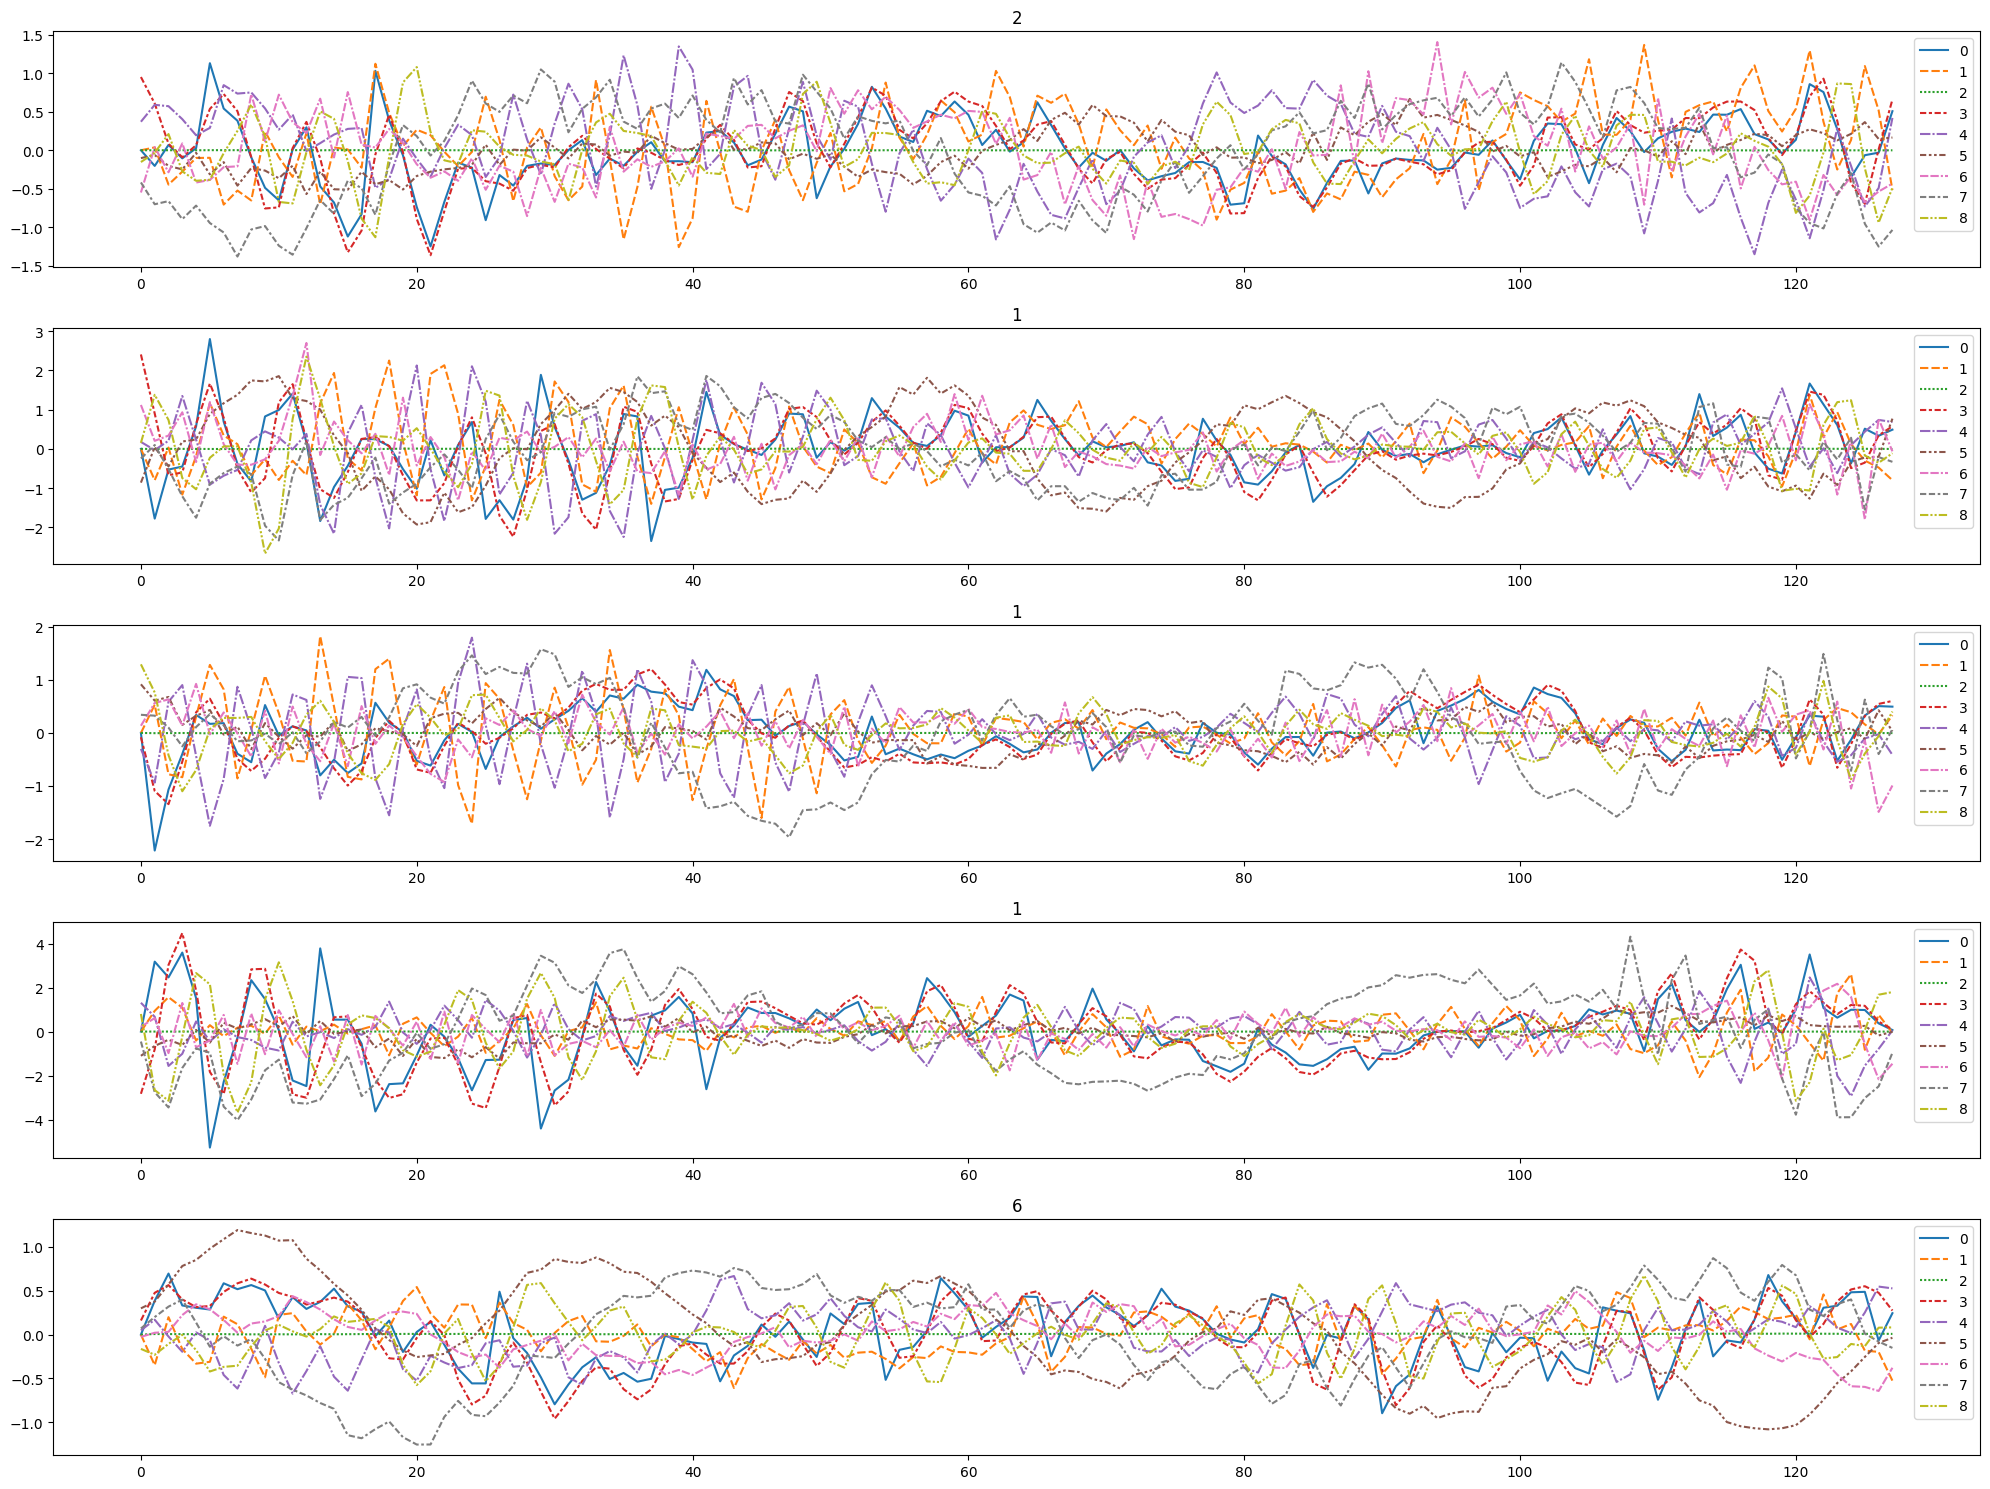

In [5]:
# Algunos plots sobre como se ven cada clase
ejemplos = 5

fig, ax = plt.subplots(nrows = ejemplos, figsize = (20,15))
for i in range(ejemplos):
  sns.lineplot(data[i], ax = ax[i], legend = 'brief')
  plt.subplots_adjust(hspace = 0.3)
  ax[i].set_title(f'{target[i]}')
plt.tight_layout()
plt.show()


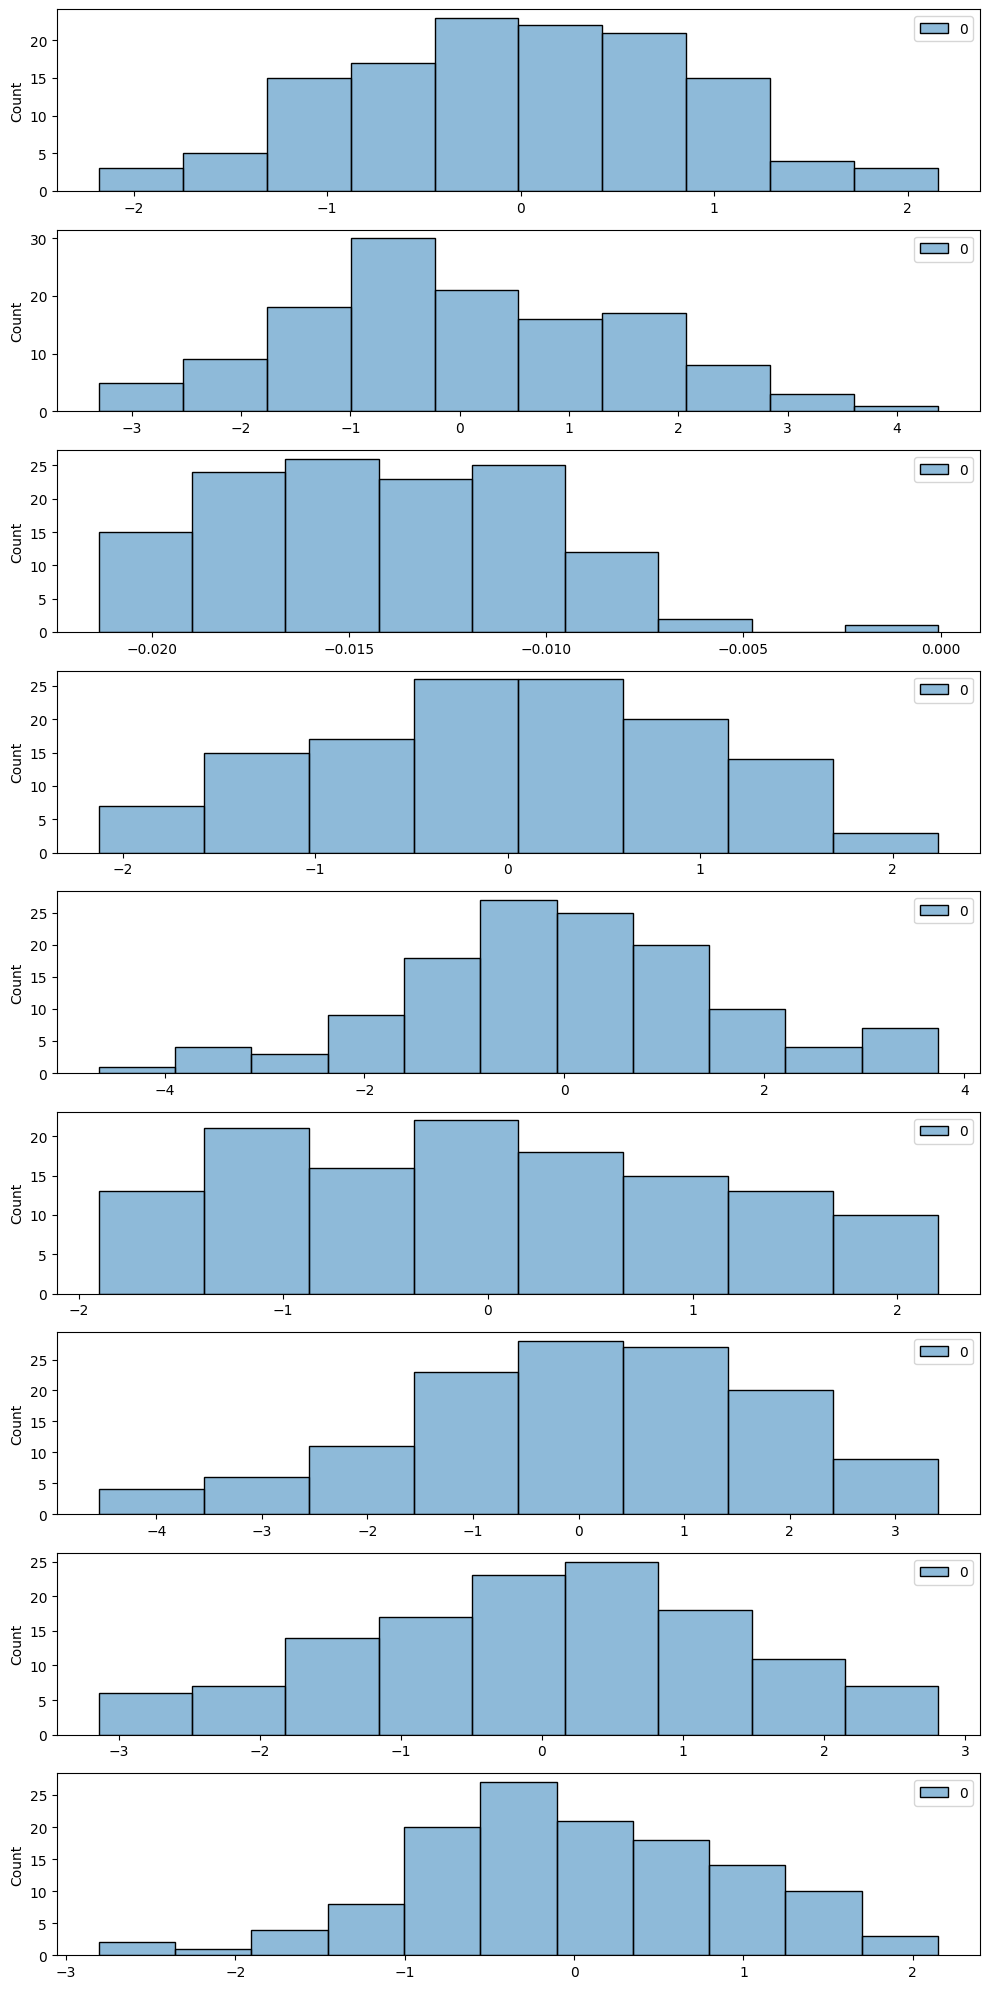

In [6]:
# Analisis del histograma de un caso random
robot1 = data[np.random.randint(0,100,1)]

fig, ax = plt.subplots(nrows = 9, figsize = (10,20))
for i in range(9):
  sns.histplot(robot1.T[i], ax = ax[i])

plt.tight_layout()
plt.show()


En general parece que todas las series tienden a comportarse normalmente. Comportamiento que es esperado dado que están normalizadas.

0    4005
1     779
5     732
8     607
7     514
2     363
4     308
6     297
3      21
dtype: int64


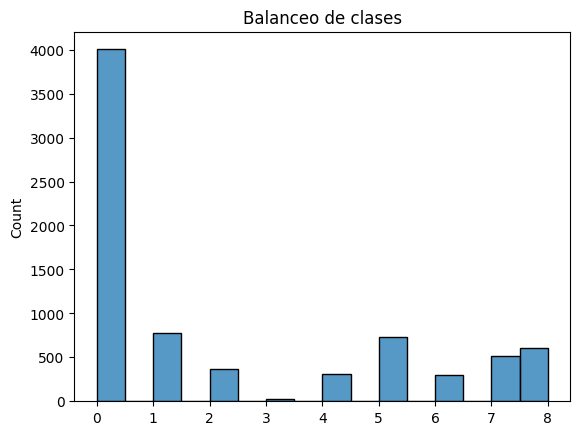

In [7]:
# Balanceo de clases
sns.histplot(target)
plt.title('Balanceo de clases')

print(pd.Series(target).value_counts())

Existe un exceso de representación sobre la clase 0 y casi no hay datos sobre la clase 3 por lo que eliminaré la clase 3 ya que no hay suficientes datos y queremos mantener un dataset sano para las demás clases.

In [8]:
# Indices de la clase 3
indexes_to_drop = []
for i in range(len(target)):
  if target[i] == 3:
    indexes_to_drop.append(i)
indexes_to_drop

# Eliminación de la clase 3
data = np.delete(data, indexes_to_drop, axis = 0)
target = np.delete(target, indexes_to_drop, axis = 0)
transformed = np.delete(transformed, indexes_to_drop, axis = 0)

0    4005
1     779
5     732
8     607
7     514
2     363
4     308
6     297
dtype: int64


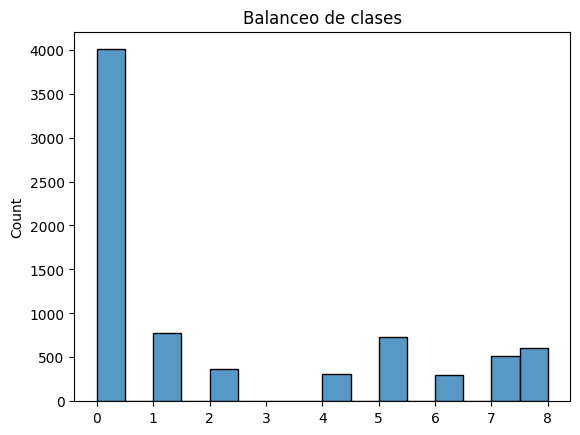

In [9]:
# Balanceo de clases
sns.histplot(target)
plt.title('Balanceo de clases')

print(pd.Series(target).value_counts())

In [10]:
import random
# Indices para undersamplear la clase 0
indexes_to_drop = []

possible_numbers = list(range(len(target)))

# Diferencia entre la clase más representada y la clase siguiente
while len(indexes_to_drop)<3226:
  n = random.sample(possible_numbers, 1)[0]
  possible_numbers.remove(n)

  if target[n] == 0:
    indexes_to_drop.append(n)



# Eliminación de la clase 3
target = np.delete(target, indexes_to_drop, axis = 0)
data = np.delete(data, indexes_to_drop, axis = 0)
transformed = np.delete(transformed, indexes_to_drop, axis = 0)
target.shape, data.shape

((4379,), (4379, 128, 9))

1    779
0    779
5    732
8    607
7    514
2    363
4    308
6    297
dtype: int64


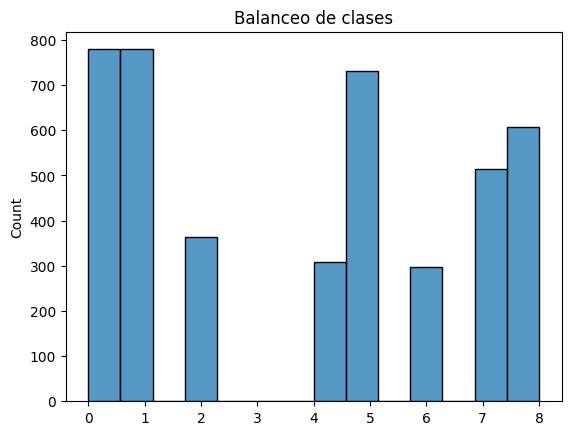

In [11]:
# Balanceo de clases
sns.histplot(target)
plt.title('Balanceo de clases')

print(pd.Series(target).value_counts())

## Creación del dataframe de resultados

In [12]:
resultados = pd.DataFrame(index = ['accuracy', 'f1-score', 'precision'])


## Modelos de machine learning

In [25]:
# For the machine learning models
from sklearn.model_selection import train_test_split

data_for_ml = data.reshape(4379, 1152)

X_train, X_test, y_train, y_test = train_test_split(data_for_ml, target, test_size = 0.25, shuffle = True)
X_train.shape, X_test.shape

((3284, 1152), (1095, 1152))

In [26]:
# Importar modelos a utilizar
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [27]:
def define_models(models=dict()):
    # nonlinear models
    models['knn'] = KNeighborsClassifier(n_neighbors=7)
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    #models['bayes'] = GaussianNB()

    # ensemble models
    #models['bag'] = BaggingClassifier(n_estimators=100)
    models['rf'] = RandomForestClassifier(n_estimators=100)
    #models['et'] = ExtraTreesClassifier(n_estimators=100)
    models['gbm'] = HistGradientBoostingClassifier()


    # Linear models
    models['logistic'] = LogisticRegression()

    print('Defined %d models' % len(models))
    return models

In [28]:
# evaluar un solo modelo
def evaluate_model(X_train, y_train, X_test, y_test, model):
    # Ajustar el modelo
    model.fit(X_train, y_train)
    # Realizar predicciones
    yhat = model.predict(X_test)
    # Evaluar predicciones
    accuracy = accuracy_score(y_test, yhat)
    f1 = f1_score(y_test, yhat, average = 'micro')
    precision = precision_score(y_test, yhat, average = 'micro')
    return accuracy * 100, f1, precision*100

In [29]:
# Evaluar diccionario de modelos {name:object}, regresa {name:score}
def evaluate_models(X_train, y_train, X_test, y_test, models, results_df):
    results = dict()
    for name, model in models.items():
        # Evaluar el modelo
        results[name] = evaluate_model(X_train, y_train, X_test, y_test, model)
        results_df[name] = results[name]
        # Mostrar el proceso
        print('>%s: %.3f' % (name, results[name][0]))
    return results

In [30]:
# Imprimir y mostrar los resultados
def summarize_results(results, maximize=True):
    # Crear lista de (name, mean(scores)) tuplas
    mean_scores = [(k,v) for k,v in results.items()]
    # Ordenar tuplas por score
    mean_scores = sorted(mean_scores, key=lambda x: x[1])
    # reverse para orden descendiente (ej. para accuracy)
    if maximize:
        mean_scores = list(reversed(mean_scores))
    print()
    for name, score in mean_scores:
        print('Name=%s, Score=%.3f' % (name, score))

In [31]:
# Generar el diccionario de modelos
models = define_models()

# Evaluar los modelos
results = evaluate_models(X_train, y_train, X_test, y_test, models, resultados)

# Resumir los resultados de los modelos
#summarize_results(results)

Defined 6 models
>knn: 15.251
>cart: 24.658
>svm: 30.320
>rf: 39.178
>gbm: 46.849
>logistic: 25.845


In [32]:
resultados

knn       cart        svm         rf        gbm   logistic
accuracy   15.251142  24.657534  30.319635  39.178082  46.849315  25.844749
f1-score    0.152511   0.246575   0.303196   0.391781   0.468493   0.258447
precision  15.251142  24.657534  30.319635  39.178082  46.849315  25.844749

Muy malos resultados. Deberían mejorar con los modelos de deep learning.

La razón por la que los modelos de deep learning hayan tenido tan mal rendimiento puede deberse a la forma del dataset. Hay demasiadas features para los modelos, al menos respecto al total de muestras que tenemos.

Por las características del problema quizá xgboost sea un modelo que brinde mejores restulados. Los modelos basados en árboles tuvieron un mejor desempeño que los modelos no lineales.


## Redes convolucionales

In [33]:
# Spit for deep learning models
from sklearn.model_selection import train_test_split
import keras
target = keras.utils.to_categorical(target)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.20, shuffle = True )
X_train.shape, X_test.shape

((3503, 128, 9), (876, 128, 9))

In [38]:
# Importar librerías
from keras.layers import MaxPooling1D
from keras.layers import Conv1D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense, BatchNormalization, Input
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import tensorflow as tf



In [47]:
# Ajustar y evaluar el modelo

verbose, epochs, batch_size = 0, 1000, 32
# Definición de la arquitectura del modelo
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

# Definir el modelo CNN

model = Sequential()
model.add(Input(shape = (n_timesteps, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

callbacks = EarlyStopping(patience = 25, monitor='val_loss')
adam = Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam , metrics=['accuracy', tf.keras.metrics.F1Score(), tf.keras.metrics.Precision()])
model.build()


# Ajustar el modelo
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_split = 0.2, callbacks = callbacks)
# Evaluar el modelo
_, accuracy,f1,precission = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print(accuracy)

results['CNN-1'] = [accuracy*100, f1*100, precission*100]

0.43493151664733887


In [48]:
pd.DataFrame(history.history)

loss  accuracy                                           f1_score  \
0   1.994728  0.197002  [0.17802197, 0.30163935, 0.0, 0.0, 0.16018307,...   
1   1.602053  0.352605  [0.17938145, 0.43771046, 0.15151516, 0.0, 0.51...   
2   1.298834  0.513562  [0.2867133, 0.5834147, 0.5363128, 0.0, 0.64942...   
3   1.078314  0.610278  [0.39426523, 0.6810176, 0.6234414, 0.0, 0.7172...   
4   0.893531  0.683084  [0.5066964, 0.7495146, 0.6476684, 0.0, 0.78962...   
5   0.757862  0.737330  [0.58898306, 0.80079293, 0.68030685, 0.0, 0.81...   
6   0.657985  0.776945  [0.6349535, 0.8363637, 0.755448, 0.0, 0.876712...   
7   0.520119  0.829764  [0.733813, 0.90270805, 0.79713607, 0.0, 0.8918...   
8   0.449784  0.854033  [0.757852, 0.9227683, 0.8657408, 0.0, 0.918367...   
9   0.377514  0.881156  [0.8133874, 0.93768543, 0.89400923, 0.0, 0.936...   
10  0.321865  0.897930  [0.84762865, 0.93650794, 0.89449537, 0.0, 0.92...   
11  0.287746  0.910778  [0.8630953, 0.9513407, 0.9136364, 0.0, 0.93670...   
12  0.244923  0.929336  [0.89849246, 0.9533267, 0.948775, 0.0, 0.95959...   
13  0.210488  0.943612  [0.91217566, 0.96252465, 0.95111114, 0.0, 0.96...   
14  0.210718  0.940757  [0.91848904, 0.95721394, 0.95111114, 0.0, 0.95...   
15  0.154336  0.957173  [0.94516456, 0.9732937, 0.96460176, 0.0, 0.987...   
16  0.163599  0.954675  [0.937751, 0.96939784, 0.9647577, 0.0, 0.97989...   
17  0.104595  0.972876  [0.9664032, 0.9861386, 0.9714286, 0.0, 0.98989...   
18  0.143105  0.960385  [0.93519443, 0.9574678, 0.9826087, 0.0, 0.9721...   
19  0.113875  0.972876  [0.96844184, 0.97047246, 0.98695654, 0.0, 0.98...   
20  0.099984  0.973590  [0.9671642, 0.97931033, 0.9891068, 0.0, 0.9798...   
21  0.085382  0.974304  [0.96939784, 0.98318493, 0.9868421, 0.0, 0.989...   
22  0.086712  0.976445  [0.9714847, 0.9782178, 0.99126637, 0.0, 0.9898...   
23  0.070026  0.982869  [0.9761905, 0.986166, 0.9890591, 0.0, 0.994949...   
24  0.072233  0.982869  [0.980198, 0.9852507, 0.9803063, 0.0, 0.994949...   
25  0.061787  0.983226  [0.9812438, 0.98318493, 0.9868421, 0.0, 0.9974...   
26  0.050048  0.989293  [0.9871921, 0.98911965, 0.99346405, 0.0, 1.0, ...   
27  0.045402  0.991792  [0.99211043, 0.9930762, 0.9956331, 0.0, 0.9974...   
28  0.025531  0.995004  [0.996063, 0.99408287, 1.0, 0.0, 0.99746835, 0...   

    precision_2  val_loss  val_accuracy  \
0      0.307692  1.808870      0.293866   
1      0.685851  1.496692      0.445078   
2      0.728538  1.346436      0.500713   
3      0.786647  1.325239      0.507846   
4      0.837558  1.360245      0.499287   
5      0.864546  1.430024      0.506419   
6      0.874586  1.505231      0.516405   
7      0.912583  1.580112      0.516405   
8      0.914654  1.628406      0.522111   
9      0.929374  1.916077      0.473609   
10     0.936743  1.935693      0.482168   
11     0.939754  2.026227      0.513552   
12     0.949792  2.079699      0.483595   
13     0.961295  2.138870      0.497860   
14     0.958055  2.217560      0.490728   
15     0.969174  2.198090      0.517832   
16     0.965922  2.237414      0.492154   
17     0.982533  2.340262      0.507846   
18     0.967648  2.195998      0.495007   
19     0.979348  2.752586      0.497860   
20     0.978685  2.682245      0.495007   
21     0.980555  2.637365      0.510699   
22     0.981615  2.798348      0.513552   
23     0.985273  2.762326      0.507846   
24     0.985284  2.807475      0.496434   
25     0.986710  3.006895      0.487874   
26     0.992821  3.119537      0.495007   
27     0.993195  3.079566      0.480742   
28     0.995350  3.324494      0.480742   

                                         val_f1_score  val_precision_2  
0   [0.2179487, 0.37593985, 0.06896551, 0.0, 0.513...         0.950000  
1   [0.116883114, 0.54621845, 0.37894738, 0.0, 0.5...         0.703704  
2   [0.14193548, 0.36781612, 0.53061223, 0.0, 0.61...         0.657795  
3   [0.22807017, 0.5280528, 0.58823526, 0.0, 0.599...         0.631229  
4   [0.19999999, 0.50205755, 0.53333336, 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

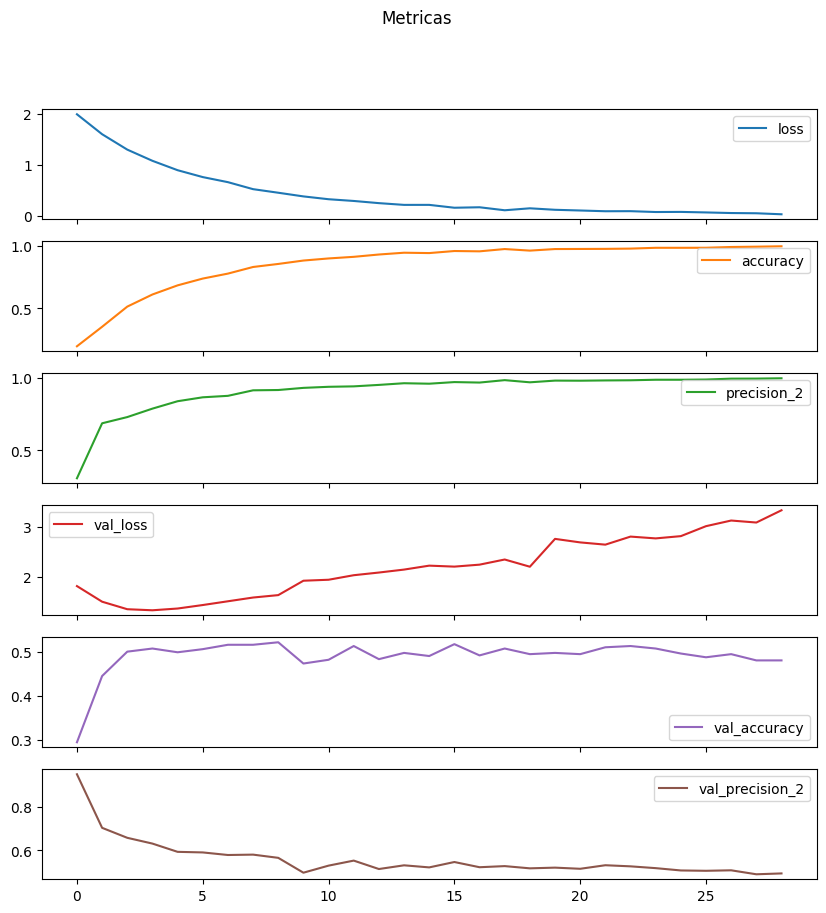

In [51]:
# Metricas
pd.DataFrame(history.history).plot(subplots = True,
                                   title = 'Metricas', figsize = (10,10))

Aprendió muy mal. Su rendimiento fue mejor que el de los modelos de machine learning. Voy a modificar la arquitectura

In [53]:
#Ajustar y evaluar el modelo

verbose, epochs, batch_size = 0, 1000, 32
# Definición de la arquitectura del modelo
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

# Definir el modelo CNN

model = Sequential()
model.add(Input(shape = (n_timesteps, n_features)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(Conv1D(filters = 12, kernel_size = 2, activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(33, activation = 'relu'))
model.add(Dense(n_outputs, activation='softmax'))

callbacks = EarlyStopping(patience = 25, monitor='val_loss')
adam = Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam ,metrics=['accuracy', tf.keras.metrics.F1Score(), tf.keras.metrics.Precision()])
model.build()


# Ajustar el modelo
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_split = 0.2, callbacks = callbacks)
# Evaluar el modelo
_, accuracy,f1,precission = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print(accuracy)

results['CNN-2'] = [accuracy*100, f1*100, precission*100]

0.44634702801704407


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

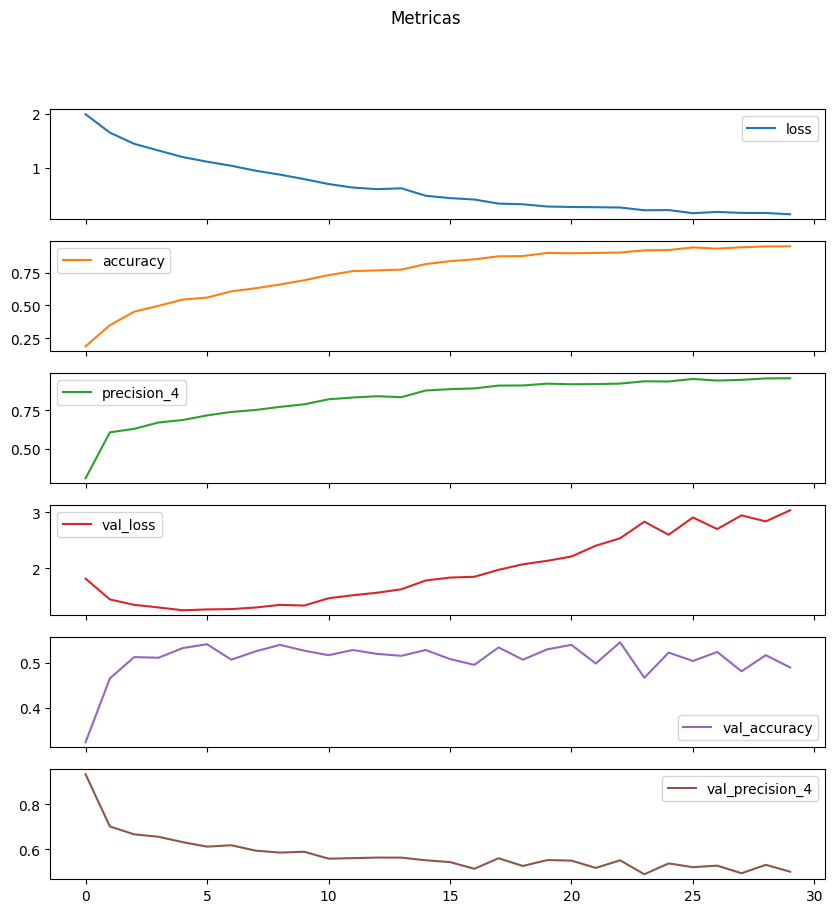

In [54]:
# Metricas
pd.DataFrame(history.history).plot(subplots = True,
                                   title = 'Metricas', figsize = (10,10))

Pareciera que empieza a aprender y después hace lo que quiere. Tal vez se atora en el descenso del gradiente. Voy a modificar la tasa de aprendizaje y aumentar el tamaño de los batch

In [56]:
#Ajustar y evaluar el modelo

verbose, epochs, batch_size = 0, 1000, 64
# Definición de la arquitectura del modelo
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

# Definir el modelo CNN

model = Sequential()
model.add(Input(shape = (n_timesteps, n_features)))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(Conv1D(filters = 12, kernel_size = 2, activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(33, activation = 'relu'))
model.add(Dense(n_outputs, activation='softmax'))

callbacks = EarlyStopping(patience = 25, monitor='val_loss')
adam = Adam(learning_rate = 0.00001, clipvalue = 0.5)
model.compile(loss='categorical_crossentropy', optimizer=adam , metrics=['accuracy', tf.keras.metrics.F1Score(), tf.keras.metrics.Precision()])
model.build()


# Ajustar el modelo
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_split = 0.2, callbacks = callbacks)
# Evaluar el modelo
_, accuracy,f1,precission = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print(accuracy)

results['CNN-3'] = [accuracy*100, f1*100, precission*100]

0.49771690368652344


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

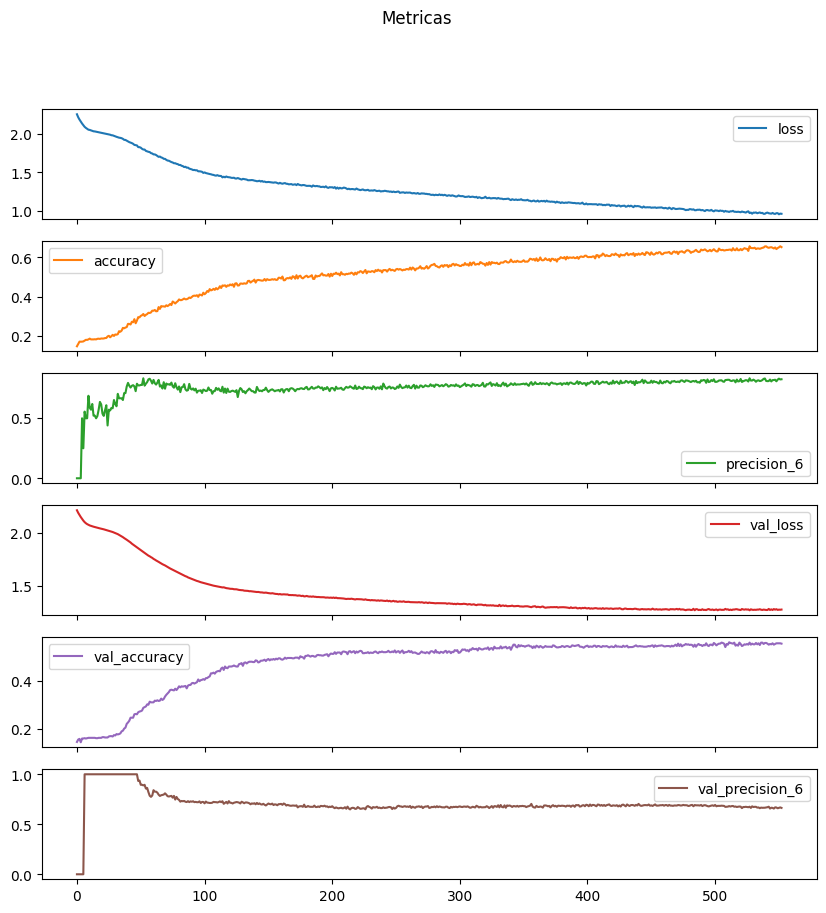

In [57]:
# Metricas
pd.DataFrame(history.history).plot(subplots = True,
                                   title = 'Metricas', figsize = (10,10))

Tuvo un comportamiento mucho mejor. Lo que no es ideal es que ahora no parece mejorar el accuracy.

### LSTM

In [58]:
from keras.layers import LSTM

In [59]:
# Para empezar quiero ver como se comporta el LSTM con el learning rate default y una arquitectura básica

verbose, epochs, batch_size = 0, 100, 64

n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))



callbacks = EarlyStopping(patience = 25, monitor='val_loss')
adam = Adam(clipvalue = 0.5)
model.compile(loss='categorical_crossentropy', optimizer=adam , metrics=['accuracy', tf.keras.metrics.F1Score(), tf.keras.metrics.Precision()])
model.build()

# fit network
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, callbacks = callbacks, validation_split=0.2)
# evaluate model
_, accuracy,f1,precission = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print(accuracy)

results['LSTM-1'] = [accuracy*100, f1*100, precission*100]

0.3652968108654022


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

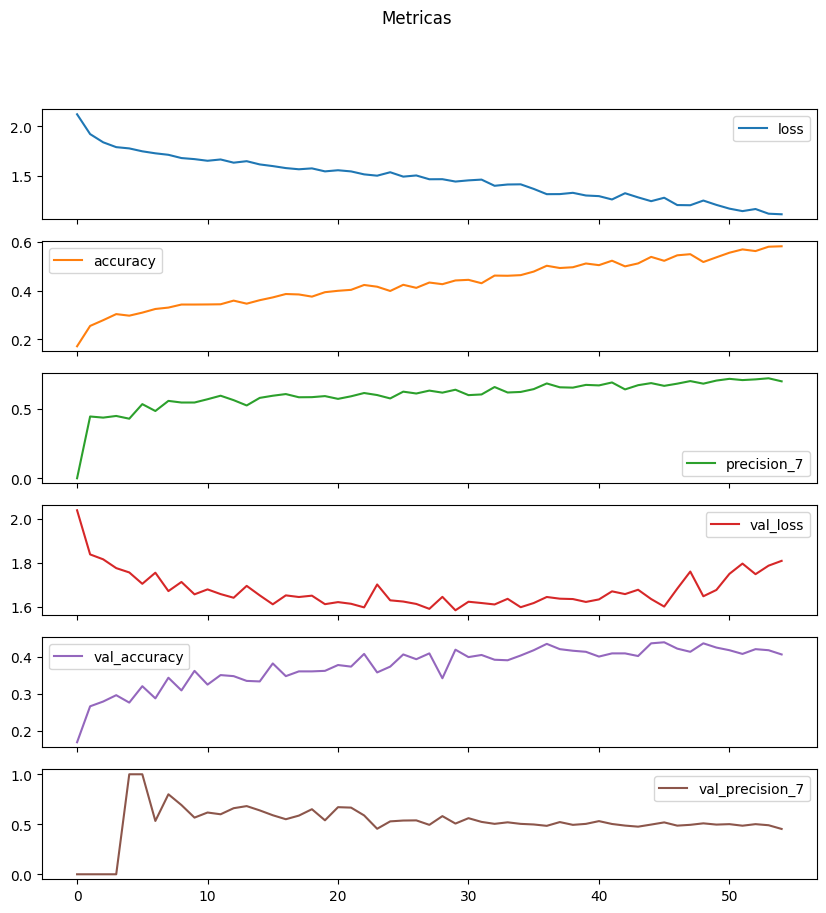

In [60]:
# Metricas
pd.DataFrame(history.history).plot(subplots = True,
                                   title = 'Metricas', figsize = (10,10))

Sucede el mismo fenómeno. Aumentaré el tamaño de la arquitectura y reduciré la tasa de aprendizaje

In [61]:
# Para empezar quiero ver como se comporta el LSTM con el learning rate default y una arquitectura básica

verbose, epochs, batch_size = 0, 1000, 64

n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

model = Sequential()
model.add(LSTM(100, return_sequences = True, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(LSTM(50))
model.add(Dense(100, activation='relu'))
model.add(Dense(33, activation = 'relu'))
model.add(Dense(n_outputs, activation='softmax'))



callbacks = EarlyStopping(patience = 25, monitor='val_loss')
adam = Adam(learning_rate = 0.00001, clipvalue = 0.5)
model.compile(loss='categorical_crossentropy', optimizer=adam , metrics=['accuracy', tf.keras.metrics.F1Score(), tf.keras.metrics.Precision()])
model.build()

# fit network
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, callbacks = callbacks, validation_split=0.2)
# evaluate model
_, accuracy,f1,precission = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print(accuracy)

results['LSTM-2'] = [accuracy*100, f1*100, precission*100]

0.3436073064804077


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

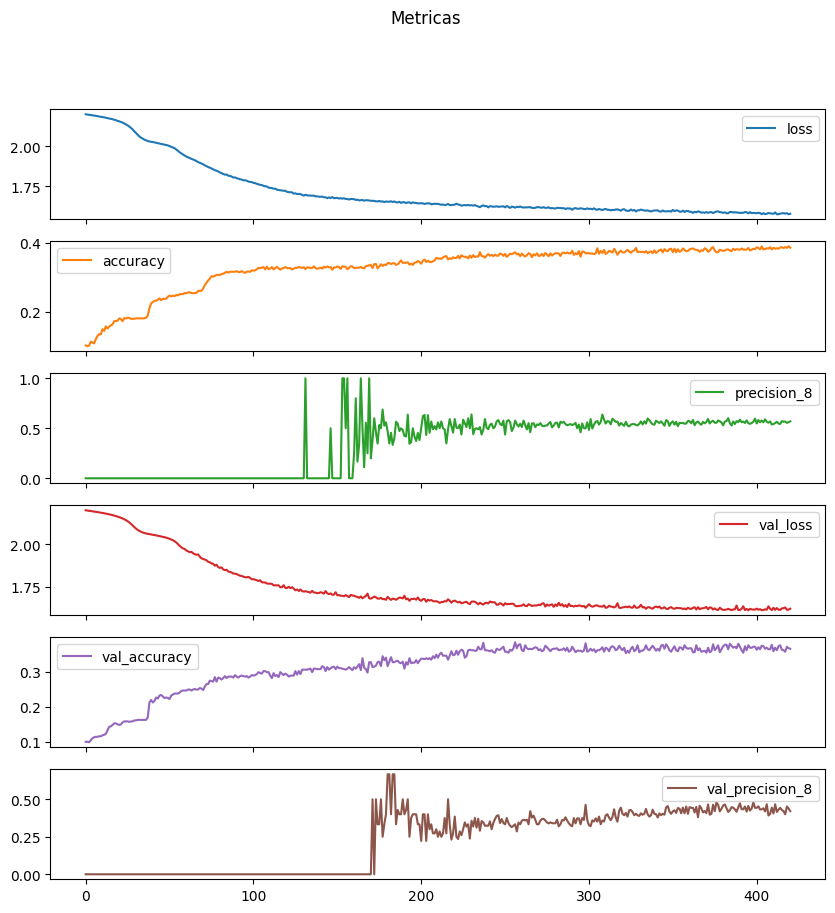

In [62]:
# Metricas
pd.DataFrame(history.history).plot(subplots = True,
                                   title = 'Metricas', figsize = (10,10))

Revisando la documentación de los datos encontré que fue parte de un concurso de kaggle. La persona que subió su notebook generó un modelo de 2 entradas, por un lado los datos sin procesar y por el otro los datos transformados.

A pesar de estar inspirado en su arquitectura, los siguientes modelos son diferentes a los presentados en ese notebook (Era un modelo únicamente convolucional).

In [63]:
from keras import Model
import tensorflow as tf
from keras.layers import Concatenate
from keras.utils import plot_model

In [64]:
train_data, test_data, train_transform, test_transform, train_target, test_target = train_test_split(data, transformed, target, test_size= 0.25, shuffle = True)

In [65]:
# Convert to tensors
train_transform = train_transform[:,:-1]
test_transform = test_transform[:,:-1]

train_data = tf.convert_to_tensor(train_data)
test_data = tf.convert_to_tensor(test_data)
train_transform = tf.convert_to_tensor(train_transform)


train_target = tf.convert_to_tensor(train_target)
test_target = tf.convert_to_tensor(test_target)


In [66]:
train_transform.shape, test_transform.shape

(TensorShape([3284, 64, 6]), (1095, 64, 6))

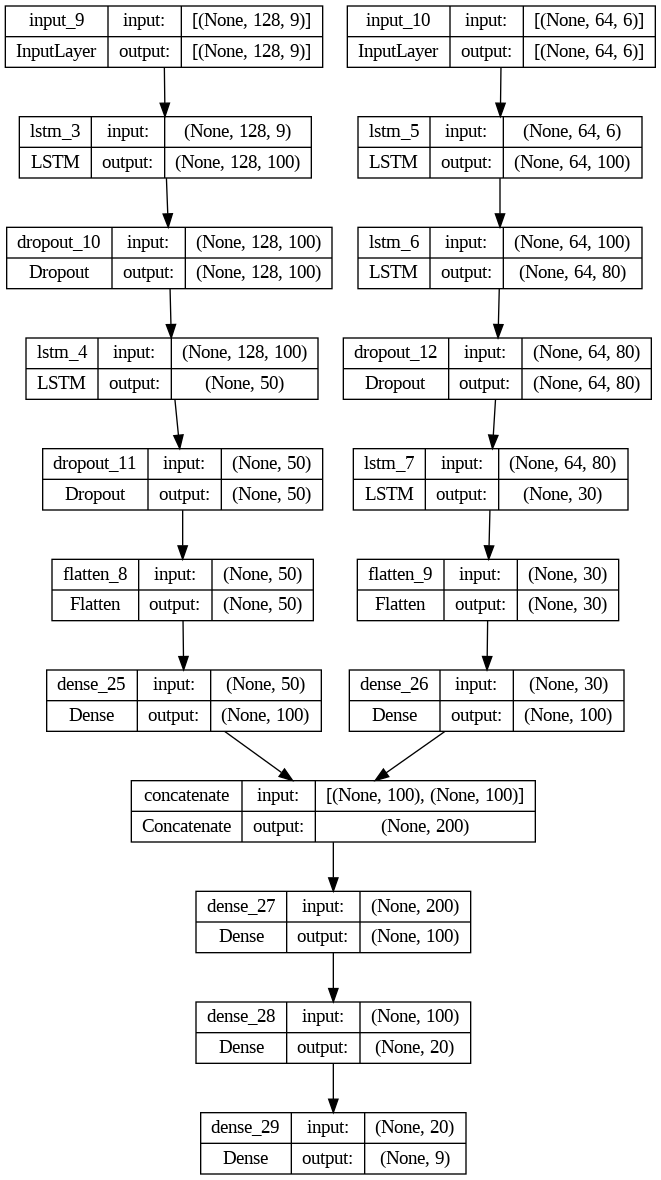

In [67]:
# Generate model
n_outputs = target.shape[1]

input_1 = Input(shape = (train_data.shape[1], train_data.shape[2]))
input_2 = Input(shape = (train_transform.shape[1], train_transform.shape[2]))

x = LSTM(100, return_sequences = True)(input_1)
x = Dropout(0.4)(x)
x = LSTM(50)(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(100, activation = 'relu')(x)

y = LSTM(100, return_sequences = True)(input_2)
y = LSTM(80, return_sequences = True)(y)
y = Dropout(0.2)(y)
y = LSTM(30)(y)
y = Flatten()(y)
y = Dense(100)(y)

z = Concatenate()([x, y])
z = Dense(100, activation = 'relu')(z)
z = Dense(20, activation = 'relu')(z)

output = Dense(n_outputs, activation = 'softmax')(z)


model = Model(inputs = [input_1, input_2], outputs = output)
adam = Adam(learning_rate = 0.0001, clipvalue = 0.5)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.F1Score(), tf.keras.metrics.Precision()])

plot_model(model, show_shapes=True)

In [68]:
# Callbacks
callbacks = EarlyStopping(patience = 25)

history = model.fit(x = [train_data, train_transform], y = train_target, epochs = 1000, callbacks = callbacks, validation_split = 0.2, verbose = 0)
# evaluate model
_, accuracy,f1,precission = model.evaluate(x = [test_data, test_transform], y = test_target, batch_size=batch_size, verbose=0)
print(accuracy)

results['LSTM-3'] = [accuracy*100, f1*100, precission*100]

0.4465753436088562


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

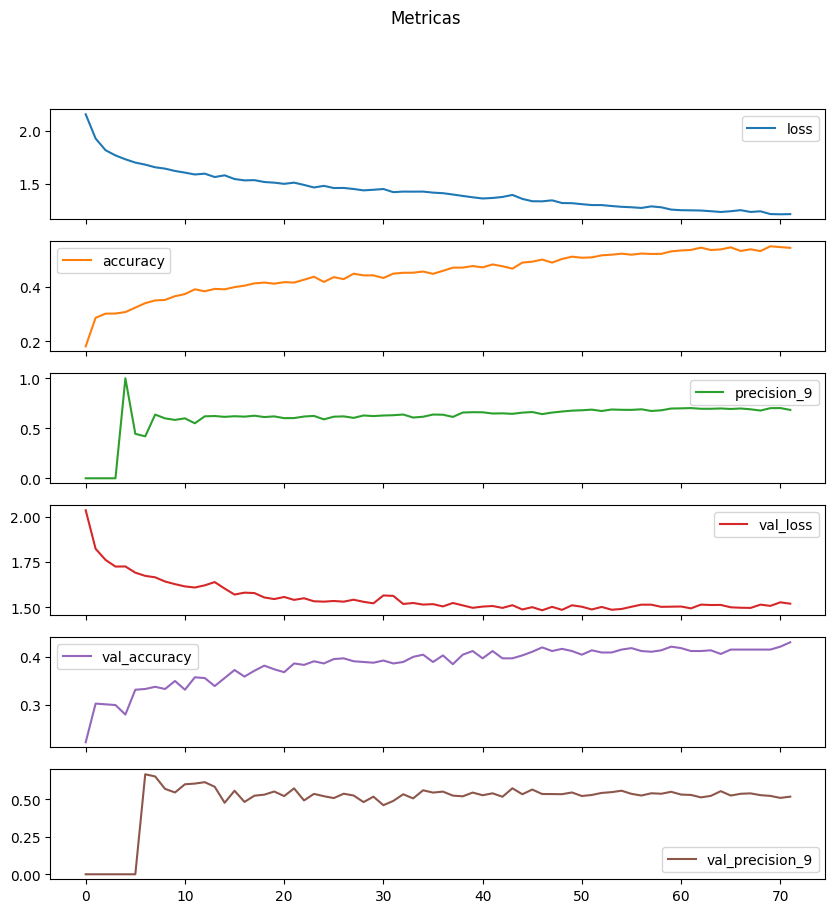

In [69]:
# Metricas
pd.DataFrame(history.history).plot(subplots = True,
                                   title = 'Metricas', figsize = (10,10))

Los resultados no tuvieron la mejora que esperaba. Espero que los siguientes modelos muestren una mejora sustancial

### ConvLSTM

Finalmente, intentaremos 2 modelos, uno de ConvLSTM y uno Conv-LSTM. Espero que estos modelos muestren mejores resultados.

In [70]:
from keras.layers import TimeDistributed, Conv1D, MaxPool2D, GlobalAveragePooling1D

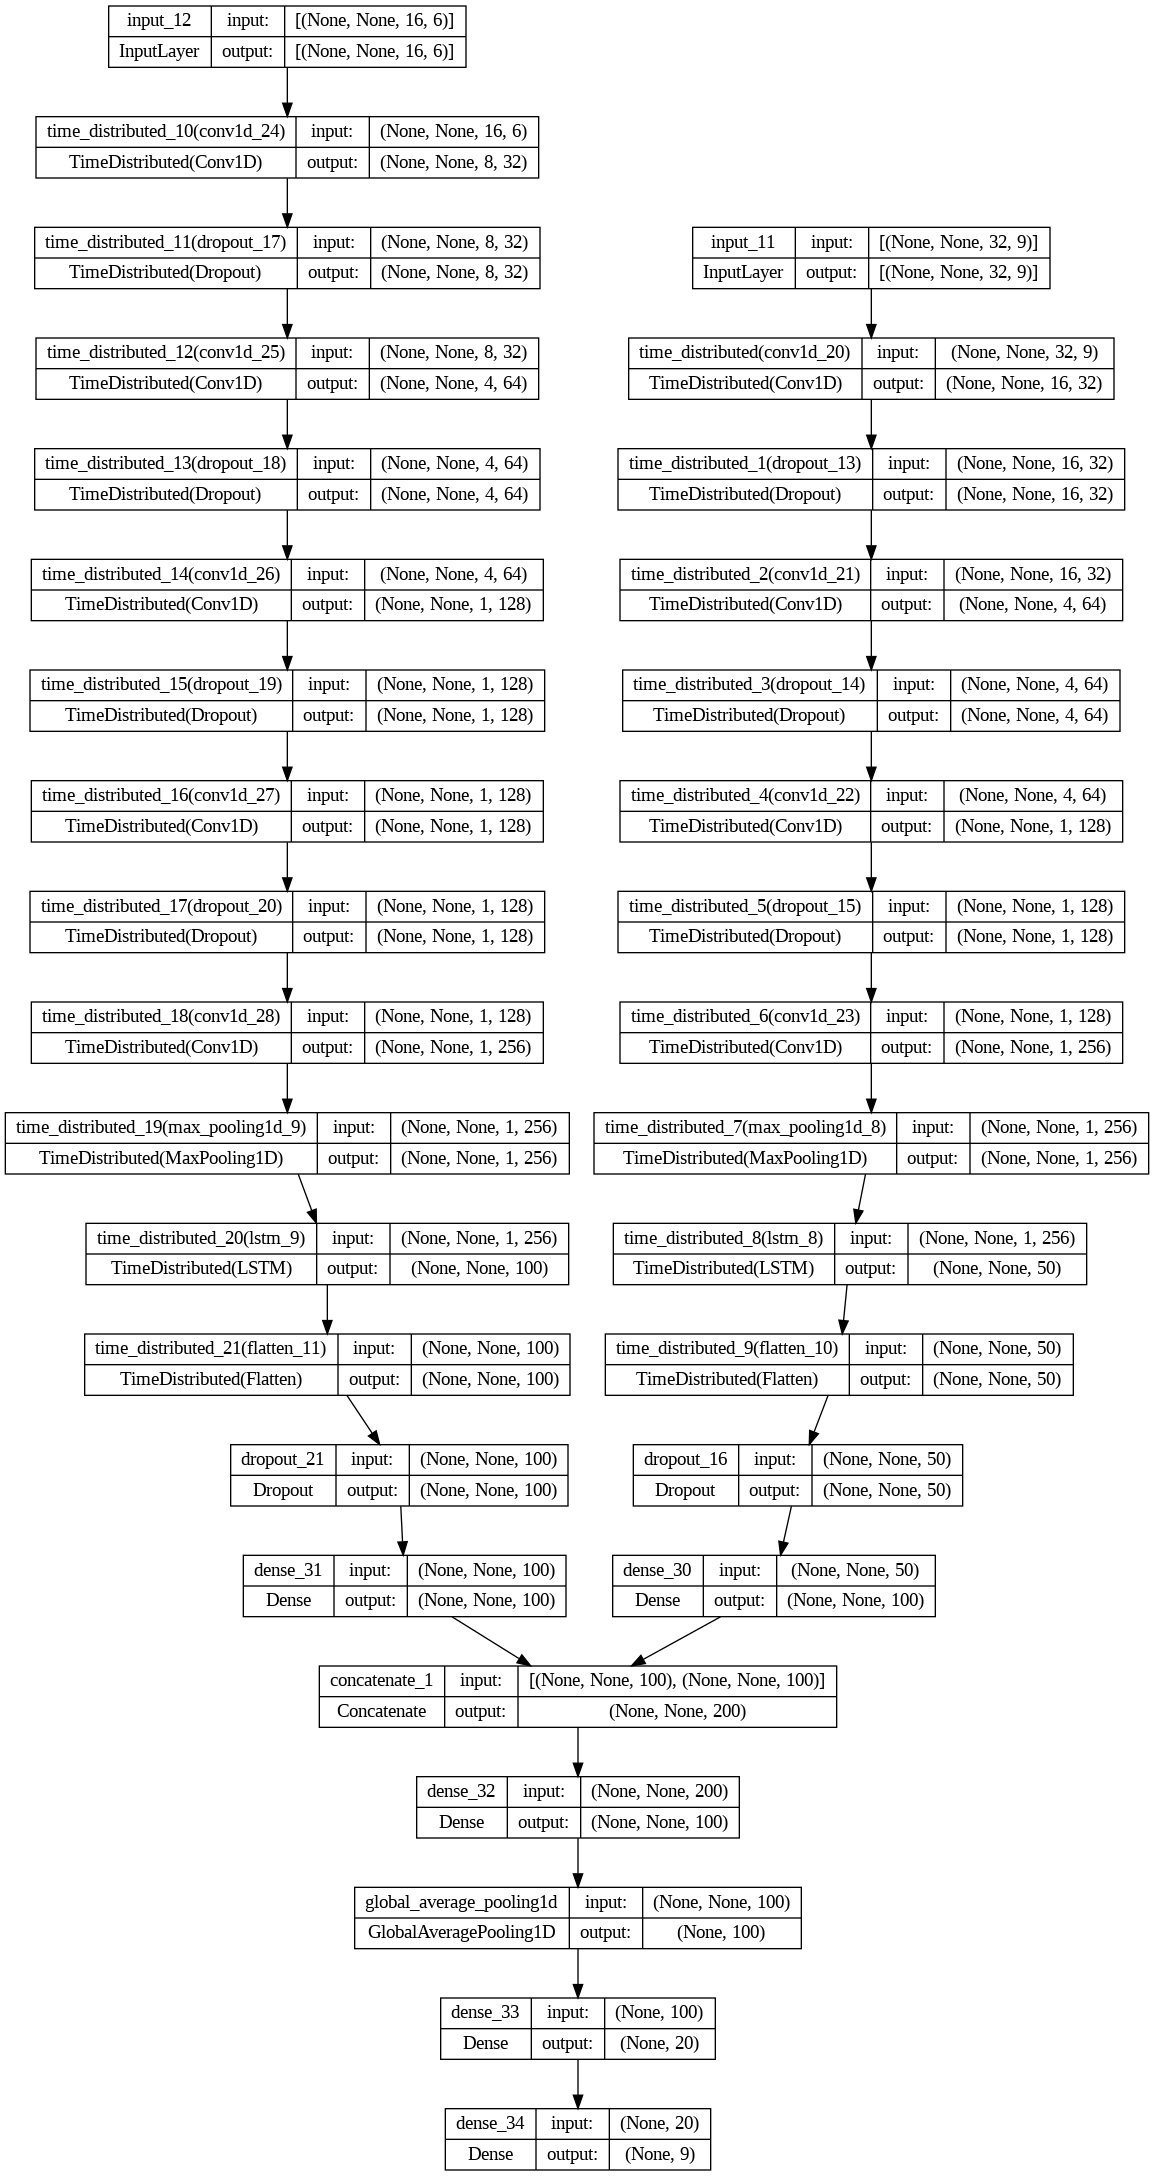

In [71]:
# Generate model
# Este modelo está inspirado en el modelo de Kaggle que obtuvo accuracy de más de 80%
# Agrego capas de time distributed y LSTM
# Para este modelo intentaré con más epocas

n_outputs = target.shape[1]
data_steps, data_length = 4, 32
transform_steps, transform_lenght = 4,16
data_features = train_data.shape[-1]
transform_features = train_transform.shape[-1]




input_1 = Input(shape = (None, data_length, data_features))
input_2 = Input(shape = (None, transform_lenght, transform_features))

x = TimeDistributed(Conv1D(32, 8 , strides = 2, padding = 'same', activation = 'relu'))(input_1)
x = TimeDistributed(Dropout(0.2))(x)
x = TimeDistributed(Conv1D(64, 8 , strides = 4,  padding = 'same', activation = 'relu'))(x)
x = TimeDistributed(Dropout(0.2))(x)
x = TimeDistributed(Conv1D(128, 8 , strides = 4,  padding = 'same', activation = 'relu'))(x)
x = TimeDistributed(Dropout(0.2))(x)
x = TimeDistributed(Conv1D(256, 8 , strides = 4,  padding = 'causal', activation = 'relu'))(x)
x = TimeDistributed(MaxPooling1D(pool_size = 1, padding = 'same'))(x)
x = TimeDistributed(LSTM(50))(x)
x = TimeDistributed(Flatten())(x)

x = Dropout(0.5)(x)
x = Dense(100, activation = 'relu')(x)



y = TimeDistributed(Conv1D(32, 8 , strides = 2,  padding = 'same',activation = 'relu'))(input_2)
y = TimeDistributed(Dropout(0.2))(y)
y = TimeDistributed(Conv1D(64, 8 , strides = 2,  padding = 'same',activation = 'relu'))(y)
y = TimeDistributed(Dropout(0.2))(y)
y = TimeDistributed(Conv1D(128, 8 , strides = 4,  padding = 'same',activation = 'relu'))(y)
y = TimeDistributed(Dropout(0.2))(y)
y = TimeDistributed(Conv1D(128, 8 , strides = 4,  padding = 'same',activation = 'relu'))(y)
y = TimeDistributed(Dropout(0.2))(y)
y = TimeDistributed(Conv1D(256, 8 , strides = 2,  padding = 'causal',activation = 'relu'))(y)
y = TimeDistributed(MaxPooling1D(pool_size = 1, padding = 'same'))(y)
y = TimeDistributed(LSTM(100))(y)
y = TimeDistributed(Flatten())(y)

y = Dropout(0.2)(y)
y = Dense(100)(y)

z = Concatenate()([x, y])
z = Dense(100, activation = 'relu')(z)
z = GlobalAveragePooling1D()(z)
z = Dense(20, activation = 'relu')(z)

output = Dense(n_outputs, activation = 'softmax')(z)


model = Model(inputs = [input_1, input_2], outputs = output)
adam = Adam(learning_rate = 0.0001, clipvalue = 0.5)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.F1Score(), tf.keras.metrics.Precision()])

plot_model(model, show_shapes=True)

In [72]:
train_data = tf.reshape(train_data, shape=(train_data.shape[0], data_steps, data_length, data_features))
test_data = tf.reshape(test_data, shape = (test_data.shape[0], data_steps, data_length, data_features))

train_transform = tf.reshape(train_transform, shape=(train_transform.shape[0], transform_steps, transform_lenght, transform_features))
test_transform = tf.reshape(test_transform, shape = (test_transform.shape[0], transform_steps, transform_lenght, transform_features))


In [73]:
# Callbacks
callbacks = EarlyStopping(patience = 150)

history = model.fit(x = [train_data, train_transform], y = train_target, epochs = 1000, callbacks = callbacks, validation_split = 0.2, verbose = 0)
# evaluate model
_, accuracy,f1,precission = model.evaluate(x = [test_data, test_transform], y = test_target, batch_size=batch_size, verbose=0)
print(accuracy)

resultados['CNN-LSTM-TD'] = [accuracy*100, f1*100, precission*100]

0.5589041113853455


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

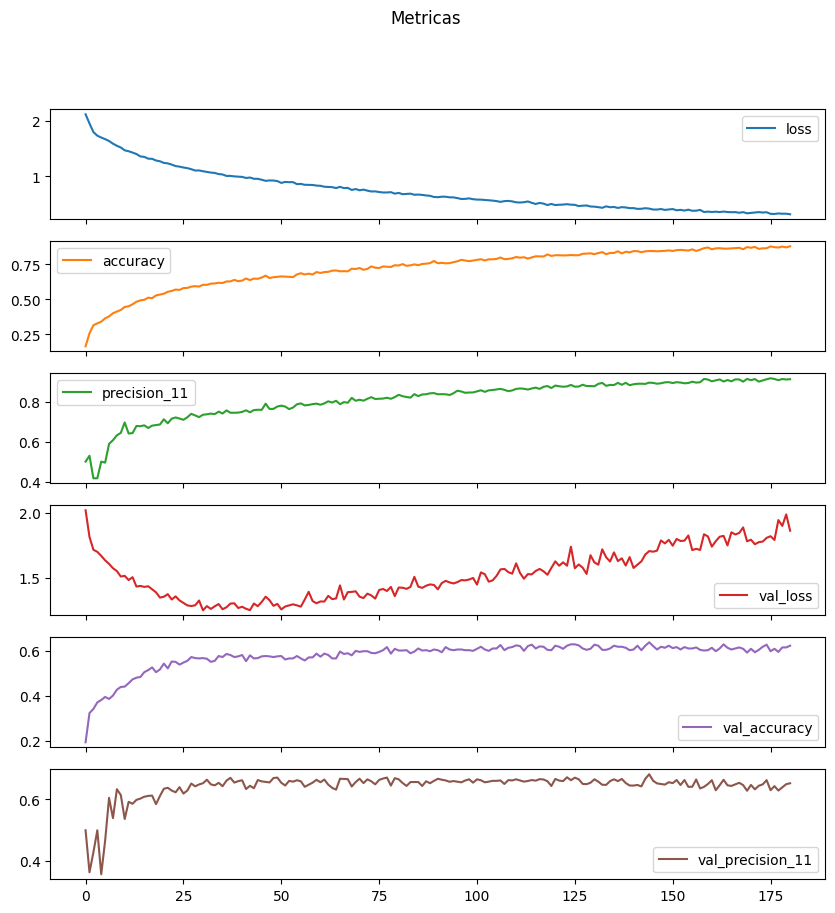

In [81]:
# Metricas
pd.DataFrame(history.history).plot(subplots = True,
                                   title = 'Metricas', figsize = (10,10))

### Conv - LSTM

In [82]:
from keras.layers import ConvLSTM2D, GlobalAvgPool2D

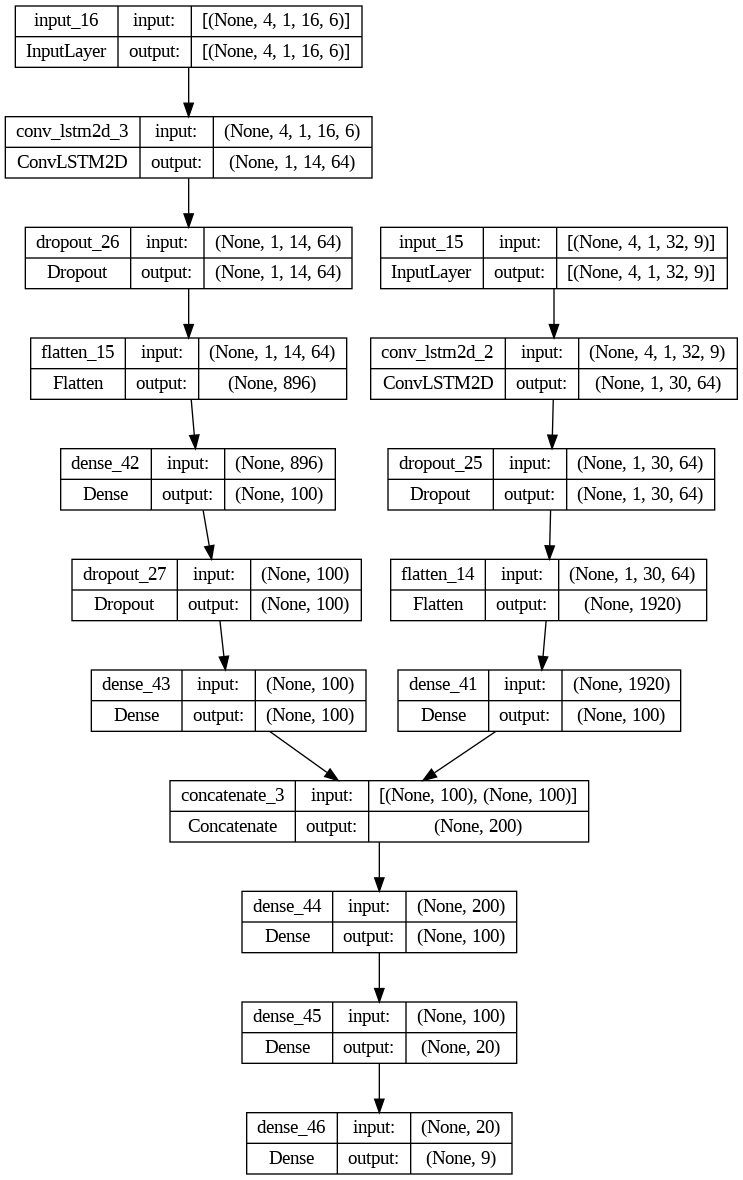

In [83]:
# Este modelo tendrá 2 entradas y una salida como los anteriores, pero será usando la capa CONVLSTM de keras, omitiré también el uso de Time distributed

n_outputs = target.shape[1]
data_steps, data_length = 4, 32
transform_steps, transform_lenght = 4,16
data_features = train_data.shape[-1]
transform_features = train_transform.shape[-1]




input_1 = Input(shape = (data_steps, 1, data_length, data_features))
input_2 = Input(shape = (transform_steps, 1, transform_lenght, transform_features))


x = ConvLSTM2D(64, (1,3), activation='relu')(input_1)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(100, activation = 'relu')(x)


y = ConvLSTM2D(64, (1,3), activation='relu')(input_2)
y = Dropout(0.5)(y)
y = Flatten()(y)
y = Dense(100, activation = 'relu')(y)
y = Dropout(0.2)(y)
y = Dense(100)(y)

z = Concatenate()([x, y])
z = Dense(100, activation = 'relu')(z)
z = Dense(20, activation = 'relu')(z)

output = Dense(n_outputs, activation = 'softmax')(z)


model = Model(inputs = [input_1, input_2], outputs = output)
adam = Adam(learning_rate = 0.0001, clipvalue = 0.5)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.F1Score(), tf.keras.metrics.Precision()])

plot_model(model, show_shapes=True)

In [84]:
# Reshape data
train_data = tf.reshape(train_data, shape=(train_data.shape[0], data_steps,1, data_length, data_features))
test_data = tf.reshape(test_data, shape = (test_data.shape[0], data_steps,1, data_length, data_features))

train_transform = tf.reshape(train_transform, shape=(train_transform.shape[0], transform_steps,1, transform_lenght, transform_features))
test_transform = tf.reshape(test_transform, shape = (test_transform.shape[0], transform_steps,1, transform_lenght, transform_features))


In [78]:
# Callbacks
callbacks = EarlyStopping(patience = 150)

history = model.fit(x = [train_data, train_transform], y = train_target, epochs = 1000, callbacks = callbacks, validation_split = 0.2, verbose = 0)
# evaluate model
_, accuracy,f1,precission = model.evaluate(x = [test_data, test_transform], y = test_target, batch_size=batch_size, verbose=0)
print(accuracy)

resultados['CNN-LSTM'] = [accuracy*100, f1*100, precission*100]

0.6009132266044617


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

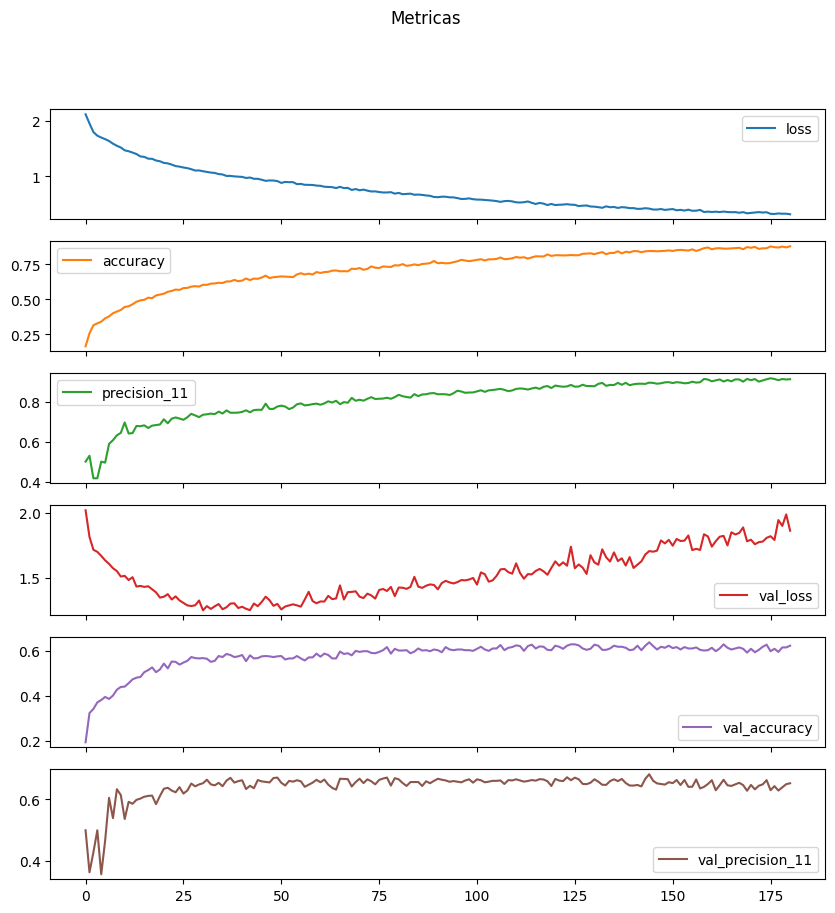

In [79]:
# Metricas
pd.DataFrame(history.history).plot(subplots = True,
                                   title = 'Metricas', figsize = (10,10))

## Analisis de resultados

In [91]:
results = pd.DataFrame(results, index = ['accuracy', 'f1-score', 'precision'])
results.T

accuracy                                           f1-score  \
knn          15.251142                                           0.152511   
cart         24.657534                                           0.246575   
svm          30.319635                                           0.303196   
rf           39.178082                                           0.391781   
gbm          46.849315                                           0.468493   
logistic     25.844749                                           0.258447   
CNN-1        43.493152  [21.604939, 47.491642, 44.285713, 0.0, 56.6037...   
CNN-2        44.634703  [22.891565, 48.780487, 49.624058, 0.0, 50.4504...   
CNN-3         49.77169  [17.898834, 55.82822, 55.6391, 0.0, 53.84616, ...   
LSTM-1       36.529681  [21.201412, 40.909092, 22.222223, 0.0, 36.9230...   
LSTM-2       34.360731  [4.5454545, 52.90322, 0.0, 0.0, 36.666668, 44....   
LSTM-3       44.657534  [8.9430895, 46.265057, 19.047619, 0.0, 41.3793...   
CNN-LSTM-TD  55.890411  [21.83908, 56.284153, 59.782608, 0.0, 70.3125,...   
CNN-LSTM     60.091323  [19.108278, 64.9652, 59.139782, 0.0, 74.80916,...   

             precision  
knn          15.251142  
cart         24.657534  
svm          30.319635  
rf           39.178082  
gbm          46.849315  
logistic     25.844749  
CNN-1        44.309926  
CNN-2         45.22059  
CNN-3        58.009708  
LSTM-1        39.18919  
LSTM-2       42.528737  
LSTM-3       54.948807  
CNN-LSTM-TD  60.021669  
CNN-LSTM     63.147408

In [ ]:
def objective(trial):
    global train_data,test_data, train_transform, test_transform, train_target, test_target

    # Definir los hiperparámetros a ajustar
    batch_size = trial.suggest_int('batch_size', 32, 128)
    filters = trial.suggest_int('filters', 32, 128)
    kernel_size = trial.suggest_int('kernel_size', 3, 11)

    num_neurons = trial.suggest_int('num_neurons', 16, 256)
    dropout_rate = trial.suggest_float('rate', 0.0, 0.7)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1)
    epochs = trial.suggest_int('epochs', 10, 200)
    verbose = 0

    #n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[-1], trainy.shape[1]


    # Definir el modelo

    n_outputs = target.shape[1]
    data_steps, data_length = 4, 32
    transform_steps, transform_lenght = 4,16
    data_features = train_data.shape[-1]
    transform_features = train_transform.shape[-1]

    # Reshape data
    train_data = tf.reshape(train_data, shape=(train_data.shape[0], data_steps,1, data_length, data_features))
    test_data = tf.reshape(test_data, shape = (test_data.shape[0], data_steps,1, data_length, data_features))

    train_transform = tf.reshape(train_transform, shape=(train_transform.shape[0], transform_steps,1, transform_lenght, transform_features))
    test_transform = tf.reshape(test_transform, shape = (test_transform.shape[0], transform_steps,1, transform_lenght, transform_features))





    input_1 = Input(shape = (data_steps, 1, data_length, data_features))
    input_2 = Input(shape = (transform_steps, 1, transform_lenght, transform_features))


    x = ConvLSTM2D(filters, (1,kernel_size), activation='relu')(input_1)
    x = Dropout(dropout_rate)(x)
    x = Flatten()(x)
    x = Dense(num_neurons, activation = 'relu')(x)


    y = ConvLSTM2D(filters, (1,kernel_size), activation='relu')(input_2)
    y = Dropout(dropout_rate)(y)
    y = Flatten()(y)
    y = Dense(num_neurons, activation = 'relu')(y)
    y = Dropout(dropout_rate)(y)
    y = Dense(num_neurons)(y)

    z = Concatenate()([x, y])
    z = Dense(num_neurons, activation = 'relu')(z)
    z = Dense(20, activation = 'relu')(z)

    output = Dense(n_outputs, activation = 'softmax')(z)


    model = Model(inputs = [input_1, input_2], outputs = output)
    adam = Adam(learning_rate = 0.0001, clipvalue = 0.5)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.F1Score(), tf.keras.metrics.Precision()])

    #plot_model(model, show_shapes=True)

    # Callbacks
    callbacks = EarlyStopping(patience = 150)

    history = model.fit(x = [train_data, train_transform],
                        y = train_target, epochs = epochs,
                        callbacks = callbacks, validation_split = 0.2, verbose = 0,
                        batch_size = batch_size)
    # evaluate model
    _, accuracy,f1,precission = model.evaluate(x = [test_data, test_transform], y = test_target, batch_size=batch_size, verbose=0)
    #print(accuracy)


    return f1

# Definir el objeto de estudio de Optuna y ejecutar la búsqueda de hiperparámetros
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Imprimir los resultados
print('Best trial:', study.best_trial.params)
print('Best validation loss:', study.best_trial.value)


[I 2023-08-04 05:37:27,939] A new study created in memory with name: no-name-cfdbb9b0-62f7-40ef-a913-5e4212b56a87


### Parámetros de entrega
La entrega de este examen se realizará a través de un link en github del cuaderno de python correspondiente. La hora de entrega es a más tardar a las 23:59 del 3 de Agosto. Se debe de enviar un correo con el link de la solución al correo odjaramilloz@iteso.mx.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>